# Imports

In [309]:
import re
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
from scipy.stats import pearsonr, linregress
import statsmodels.api as sm
from scipy.spatial import ConvexHull, Voronoi, voronoi_plot_2d
from matplotlib.patches import Ellipse
import pingouin as pg
from statsmodels.stats.multitest import multipletests
from pathlib import Path
import joblib
import json
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, WeekdayLocator, MO
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import warnings
import matplotlib.cbook
import matplotlib.dates as mdates
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import seaborn as sns
sns.set_theme(style="white")


from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor, make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.inspection import partial_dependence, PartialDependenceDisplay, permutation_importance
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, adjusted_rand_score,r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, RidgeClassifier, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier, export_text

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBRFClassifier

In [310]:
# Add project root to sys.path so you can import path_config regardless of notebook location
sys.path.append(str(Path.cwd().parents[2]))  # adjust depth as needed if notebook is deep in folders

from path_config import project_path, project_data_sources_path, project_data_exports_path, project_pt_1_models_path

print(f'project_path: {project_path}')
print(f'project_data_sources_path: {project_data_sources_path}')
print(f'project_data_exports_path: {project_data_exports_path}')
print(f'project_pt_1_models_path: {project_pt_1_models_path}')

project_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football
project_data_sources_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/sources
project_data_exports_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/exports
project_pt_1_models_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1


In [311]:
# project_path = Path.cwd()
# print(f'project_path: {project_path}')
# print('')
# project_data_sources_path = Path.cwd() / 'data' / 'sources'
# print(f'project_data_sources_path: {project_data_sources_path}')
# print('')
# project_data_exports_path = Path.cwd() / 'data' / 'exports'
# print(f'project_data_exports_path: {project_data_exports_path}')

# User Defined Functions

## Dataset Import and Wrangling

In [312]:
def load_game_results_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'game_results_df.csv',
        # sheet_name='Sheet1 (2)',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [313]:
def load_passing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'passing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [314]:
def load_receiving_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'receiving_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [315]:
def load_rushing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'rushing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [316]:
def load_spotrac_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_salary_cap_data_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [317]:
def load_nfl_season_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'nfl_season_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [318]:
def load_spotrac_nfl_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [319]:
def load_spotrac_nfl_team_pos_level_two_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_two_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [320]:
def load_team_season_records_stats_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'team_season_records_stats_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [321]:
def load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_one_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [322]:
def load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_two_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [323]:
def load_spotrac_nfl_team_pos_level_one_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_one_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [324]:
def load_spotrac_nfl_team_pos_level_two_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_two_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [325]:
def load_spotrac_nfl_team_season_roster_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [326]:
def load_spotrac_nfl_team_season_roster_pos_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_pos_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [327]:
def load_spotrac_nfl_team_season_roster_position_level_one_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_one_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [328]:
def load_spotrac_nfl_team_season_roster_position_level_two_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_two_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

## Regression Modeling

In [329]:
def create_feature_lists(dataframe):
    """
    Dynamically detects numeric and categorical features in a pandas DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input data.

    Returns:
    - numeric_features (list): List of numeric feature column names.
    - categorical_features (list): List of categorical feature column names.
    """
    numeric_selector = make_column_selector(dtype_include=np.number)
    categorical_selector = make_column_selector(dtype_include=[object, 'category'])

    numeric_features = numeric_selector(dataframe)
    categorical_features = categorical_selector(dataframe)

    return numeric_features, categorical_features

In [330]:
def create_preprocessor(is_tree_based=False, include_interactions=False, interact_all_features=False,
                        include_polynomials=False, poly_all_features=False,
                        selected_numeric_features=None, selected_categorical_features=None,
                        selected_poly_features=None, selected_interaction_numeric_features=None,
                        selected_interaction_categorical_features=None, poly_degree=1,
                        numeric_transformer=StandardScaler(), use_baseline=False, scale_numeric=True):
    """
    Create a preprocessor for machine learning algorithms with support for general, interaction,
    and polynomial features.

    Parameters:
    - is_tree_based (bool): If True, configures preprocessor for tree-based algorithms.
                            Defaults to False (non-tree algorithms).
    - include_interactions (bool): Whether to include feature interactions.
    - interact_all_features (bool): If True, creates interactions across all features.
    - include_polynomials (bool): Whether to include polynomial features for numeric columns.
    - poly_all_features (bool): If True, creates polynomial features for all numeric columns.
    - selected_numeric_features (list): General numeric features for preprocessing.
    - selected_categorical_features (list): General categorical features for preprocessing.
    - selected_poly_features (list): Numeric features for polynomial transformations.
    - selected_interaction_numeric_features (list): Numeric features for interaction terms.
    - selected_interaction_categorical_features (list): Categorical features for interaction terms.
    - poly_degree (int): Degree of polynomial features. Defaults to 1 (no higher-order terms).
    - numeric_transformer: Transformer for numeric features (e.g., StandardScaler()).
                           Defaults to StandardScaler() for non-tree algorithms.
    - use_baseline (bool): Whether to use a baseline (drop first category in one-hot encoding).
                           Defaults to False.
    - scale_numeric (bool): Whether to scale numeric features for non-tree-based models.
                            Defaults to True. If False, numeric features are passed through unchanged.

    Returns:
    - ColumnTransformer: A configured preprocessor.
    """
    if selected_numeric_features is None or selected_categorical_features is None:
        raise ValueError("Both `selected_numeric_features` and `selected_categorical_features` must be provided.")

    # Configure OneHotEncoder with or without a baseline
    ohe_params = {'handle_unknown': 'ignore'}
    if use_baseline:
        ohe_params['drop'] = 'first'

    categorical_transformer = Pipeline(steps=[
        ('ohe', OneHotEncoder(**ohe_params))
    ])

    # Define base transformers
    # If is_tree_based=True or scale_numeric=False, numeric features are passed through without scaling
    numeric_pipeline = 'passthrough' if (is_tree_based or not scale_numeric) else numeric_transformer
    transformers = [
        ('num', numeric_pipeline, selected_numeric_features),
        ('cat', categorical_transformer, selected_categorical_features)
    ]

    # Add polynomial features if required
    if include_polynomials:
        poly_transformer = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False))
        ])
        transformers.append(('polynomials', poly_transformer, selected_poly_features or selected_numeric_features))

    # Add interaction terms if required
    if include_interactions:
        if interact_all_features:
            interaction_transformer = Pipeline(steps=[
                ('ohe', OneHotEncoder(**ohe_params)),
                ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
            ])
            transformers.append(('interactions', interaction_transformer,
                                 selected_numeric_features + selected_categorical_features))
        elif (selected_interaction_numeric_features is not None and
              selected_interaction_categorical_features is not None):
            interaction_transformer = Pipeline(steps=[
                ('selected_features', ColumnTransformer(
                    transformers=[
                        ('num_selected', 'passthrough', selected_interaction_numeric_features),
                        ('cat_selected', OneHotEncoder(**ohe_params), selected_interaction_categorical_features)
                    ]
                )),
                ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
            ])
            transformers.append(('interactions', interaction_transformer,
                                 selected_interaction_numeric_features + selected_interaction_categorical_features))
        else:
            raise ValueError("Specify both `selected_interaction_numeric_features` and `selected_interaction_categorical_features` for interactions.")

    return ColumnTransformer(transformers=transformers)

## Evaluate Models

In [331]:
def evaluate_model(model, X, y):
    # Predict on the dataset
    predictions = model.predict(X)
    # Calculate RMSEpre
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return predictions, rmse

In [332]:
game_results_df = load_game_results_dataset()
passing_offense_df = load_passing_offense_dataset()
receiving_offense_df = load_receiving_offense_dataset()
rushing_offense_df = load_rushing_offense_dataset()
spotrac_df = load_spotrac_dataset()
nfl_season_records_df = load_nfl_season_records_dataset()
spotrac_nfl_records_df = load_spotrac_nfl_records_dataset()
spotrac_nfl_team_pos_level_two_grouped_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()
team_season_records_stats_df = load_team_season_records_stats_dataset()
pos_lev_one_act_inact_df = load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset()
pos_lev_two_act_inact_df = load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset()
pos_lev_one_df = load_spotrac_nfl_team_pos_level_one_grouped_dataset()
pos_lev_two_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()

spotrac_nfl_team_season_roster_df = load_spotrac_nfl_team_season_roster_df_dataset()
spotrac_nfl_team_season_roster_pos_df = load_spotrac_nfl_team_season_roster_pos_df_dataset()
spotrac_nfl_team_season_roster_position_level_one_df = load_spotrac_nfl_team_season_roster_position_level_one_df_dataset()
spotrac_nfl_team_season_roster_position_level_two_df = load_spotrac_nfl_team_season_roster_position_level_two_df_dataset()

Shape of dataframe: 26910 rows, 15 columns
Shape of dataframe: 16046 rows, 23 columns
Shape of dataframe: 61793 rows, 24 columns
Shape of dataframe: 50107 rows, 24 columns
Shape of dataframe: 59357 rows, 16 columns
Shape of dataframe: 448 rows, 38 columns
Shape of dataframe: 59357 rows, 54 columns
Shape of dataframe: 4032 rows, 13 columns
Shape of dataframe: 4054 rows, 49 columns
Shape of dataframe: 1344 rows, 23 columns
Shape of dataframe: 4032 rows, 23 columns
Shape of dataframe: 1344 rows, 13 columns
Shape of dataframe: 4032 rows, 13 columns
Shape of dataframe: 896 rows, 15 columns
Shape of dataframe: 16458 rows, 16 columns
Shape of dataframe: 2605 rows, 16 columns
Shape of dataframe: 7893 rows, 16 columns


# Create Modeling DF

In [333]:
spotrac_nfl_team_season_roster_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct
0,arizona-cardinals,2011,active,58,111028866.0,0.716049,0.937187,8,8,0.500,312,348,-36,0.667,0.583
1,arizona-cardinals,2011,inactive,23,7441498.0,0.283951,0.062813,8,8,0.500,312,348,-36,0.667,0.583
2,arizona-cardinals,2012,active,53,88769403.0,0.638554,0.753574,5,11,0.313,250,357,-107,0.167,0.250
3,arizona-cardinals,2012,inactive,30,29028393.0,0.361446,0.246426,5,11,0.313,250,357,-107,0.167,0.250
4,arizona-cardinals,2013,active,52,92369539.0,0.495238,0.769450,10,6,0.625,379,324,55,0.333,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,washington-commanders,2022,inactive,86,47974051.0,0.618705,0.230569,8,8,0.500,321,343,-22,0.417,0.458
892,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,329,518,-189,0.000,0.167
893,washington-commanders,2023,inactive,103,85438357.0,0.660256,0.389848,4,13,0.235,329,518,-189,0.000,0.167
894,washington-commanders,2024,active,53,186228005.0,0.341935,0.773911,12,5,0.706,485,391,94,0.667,0.750


In [334]:
spotrac_nfl_team_season_roster_active_df = spotrac_nfl_team_season_roster_df.loc[spotrac_nfl_team_season_roster_df['roster_status'] == 'active', :].reset_index(drop=True).copy()
spotrac_nfl_team_season_roster_active_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct
0,arizona-cardinals,2011,active,58,111028866.0,0.716049,0.937187,8,8,0.500,312,348,-36,0.667,0.583
1,arizona-cardinals,2012,active,53,88769403.0,0.638554,0.753574,5,11,0.313,250,357,-107,0.167,0.250
2,arizona-cardinals,2013,active,52,92369539.0,0.495238,0.769450,10,6,0.625,379,324,55,0.333,0.500
3,arizona-cardinals,2014,active,54,93308619.0,0.385714,0.700363,11,5,0.688,310,299,11,0.500,0.667
4,arizona-cardinals,2015,active,52,120691340.0,0.403101,0.834034,13,3,0.813,489,313,176,0.667,0.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,washington-commanders,2020,active,53,131896856.0,0.360544,0.682924,7,9,0.438,335,329,6,0.667,0.417
444,washington-commanders,2021,active,56,108019140.0,0.366013,0.558046,7,10,0.412,335,434,-99,0.333,0.500
445,washington-commanders,2022,active,53,160094196.0,0.381295,0.769431,8,8,0.500,321,343,-22,0.417,0.458
446,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,329,518,-189,0.000,0.167


In [335]:
spotrac_nfl_team_season_roster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               896 non-null    object 
 1   season             896 non-null    int64  
 2   roster_status      896 non-null    object 
 3   player_count       896 non-null    int64  
 4   cap_hit_sum        896 non-null    float64
 5   player_count_prop  896 non-null    float64
 6   cap_hit_prop       896 non-null    float64
 7   w                  896 non-null    int64  
 8   l                  896 non-null    int64  
 9   pct                896 non-null    float64
 10  pf                 896 non-null    int64  
 11  pa                 896 non-null    int64  
 12  net_pts            896 non-null    int64  
 13  div_win_pct        896 non-null    float64
 14  conf_win_pct       896 non-null    float64
dtypes: float64(6), int64(7), object(2)
memory usage: 105.1+ KB


In [336]:
X = spotrac_nfl_team_season_roster_df.loc[:, ['cap_hit_prop', 'player_count_prop',]]
y = spotrac_nfl_team_season_roster_df['pct']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

if isinstance(y_train, pd.Series):
    y_train = y_train.values.ravel()
if isinstance(y_test, pd.Series):
    y_test = y_test.values.ravel()
feature_names = X_train.columns
print(feature_names)

Index(['cap_hit_prop', 'player_count_prop'], dtype='object')


# Create Shared Modeling Objects

In [338]:
# Dynamic feature detection
selected_numeric_features, selected_categorical_features = create_feature_lists(X_train)

print(selected_numeric_features)
print(selected_categorical_features)

# Specify additional features for interactions and polynomials
# selected_poly_features = ['hipl', 'mp']
# selected_interaction_numeric_features = ['ed', 'j-ima']
# selected_interaction_categorical_features = ['position']

['cap_hit_prop', 'player_count_prop']
[]


# Linear Regression

In [339]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        scale_numeric=False,
        numeric_transformer=StandardScaler(),
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', LinearRegression())
])

lr_pipe.get_params()

lr_params = {
    'regressor__fit_intercept': [True, False]
}

lr_gs = GridSearchCV(
    estimator=lr_pipe,
    param_grid=lr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1)

lr_scores = cross_val_score(
    lr_gs,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

lr_rmse_scores = np.sqrt(-lr_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {lr_rmse_scores}")
print(f"Average RMSE from CV: {lr_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {lr_rmse_scores.std():.4f}")

lr_model = lr_gs.fit(X_train, y_train)

lr_best_params = lr_gs.best_params_
lr_best_pipe = lr_gs.best_estimator_

lr_preds = lr_gs.predict(X_test)

lr_rmse = float(np.sqrt(mean_squared_error(y_test, lr_preds)))

print(f'Best Parameters: {lr_best_params}')
print(f'Test RMSE: {lr_rmse:.4f}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Cross-Validation RMSE Scores: [0.18130812 0.19505001 0.21075599 0.19227112 0.20559768 0.18257042
 0.21469693 0.21212765 0.19365943 0.18541349]
Average RMSE from CV: 0.1973
Standard Deviation of RMSE from CV: 0.0120
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'regressor__fit_intercept': True}
Test RMSE: 0.1787


In [340]:
joblib.dump(lr_gs, project_pt_1_models_path / 'lr_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/lr_model.pkl']

In [341]:
# Get the transformed feature names after one-hot encoding and scaling
lr_feature_names_transformed = lr_best_pipe.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Linear Regression model
lr_coefs = lr_best_pipe.named_steps['regressor'].coef_.flatten()
lr_intercept = lr_best_pipe.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
lr_coef_df = pd.DataFrame({'Feature': lr_feature_names_transformed, 'Coefficient': lr_coefs})

# Add the intercept row
lr_intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [lr_intercept]})
lr_coef_df = pd.concat([lr_intercept_df, lr_coef_df], ignore_index=True)

# Display the DataFrame with coefficients
lr_coef_df.to_csv(f'{project_data_exports_path}/lr_coef_df.csv')
lr_coef_df

,Feature,Coefficient
0,Intercept,0.518282
1,num__cap_hit_prop,0.016437
2,num__player_count_prop,-0.047862


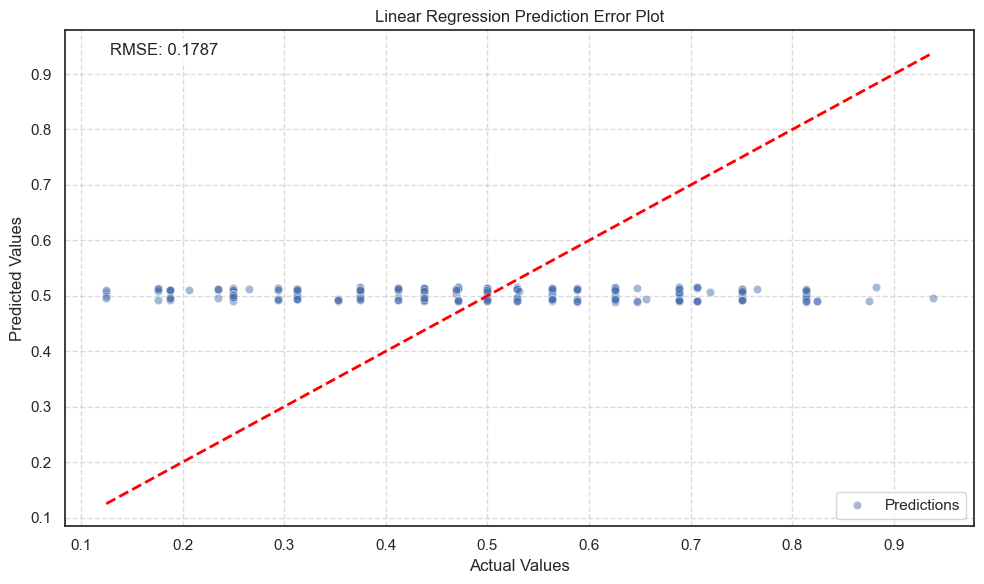

In [342]:
lr_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=lr_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {lr_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Linear Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

lr_pred_error_plot.tight_layout()

lr_pred_error_plot.savefig(f'{project_data_exports_path}/lr_pred_error_plot.png', dpi=300, bbox_inches='tight')

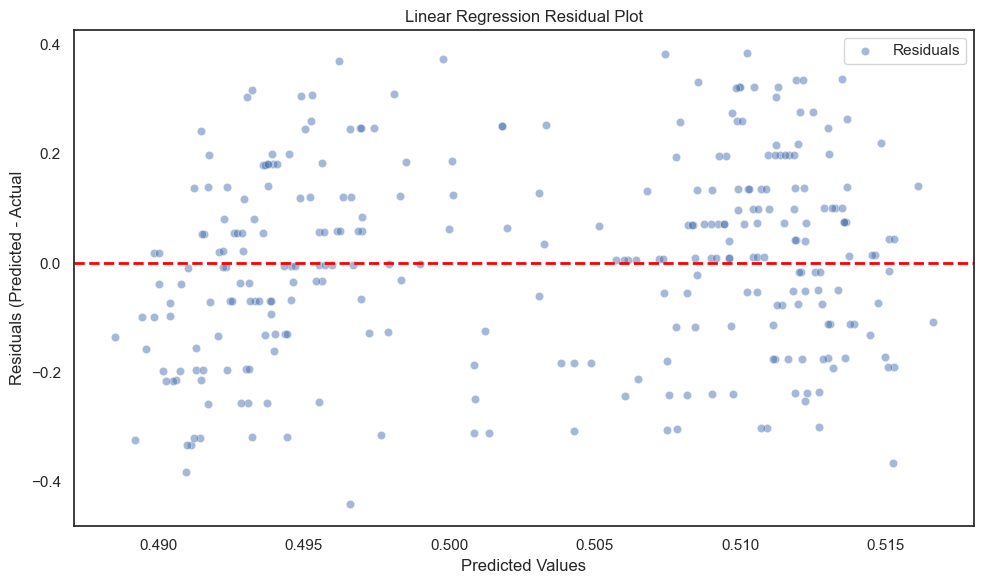

In [343]:
lr_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=lr_preds,
    y=lr_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("Linear Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
lr_residuals_plot.tight_layout()
lr_residuals_plot.savefig(f'{project_data_exports_path}/lr_residuals_plot.png', dpi=300, bbox_inches='tight')

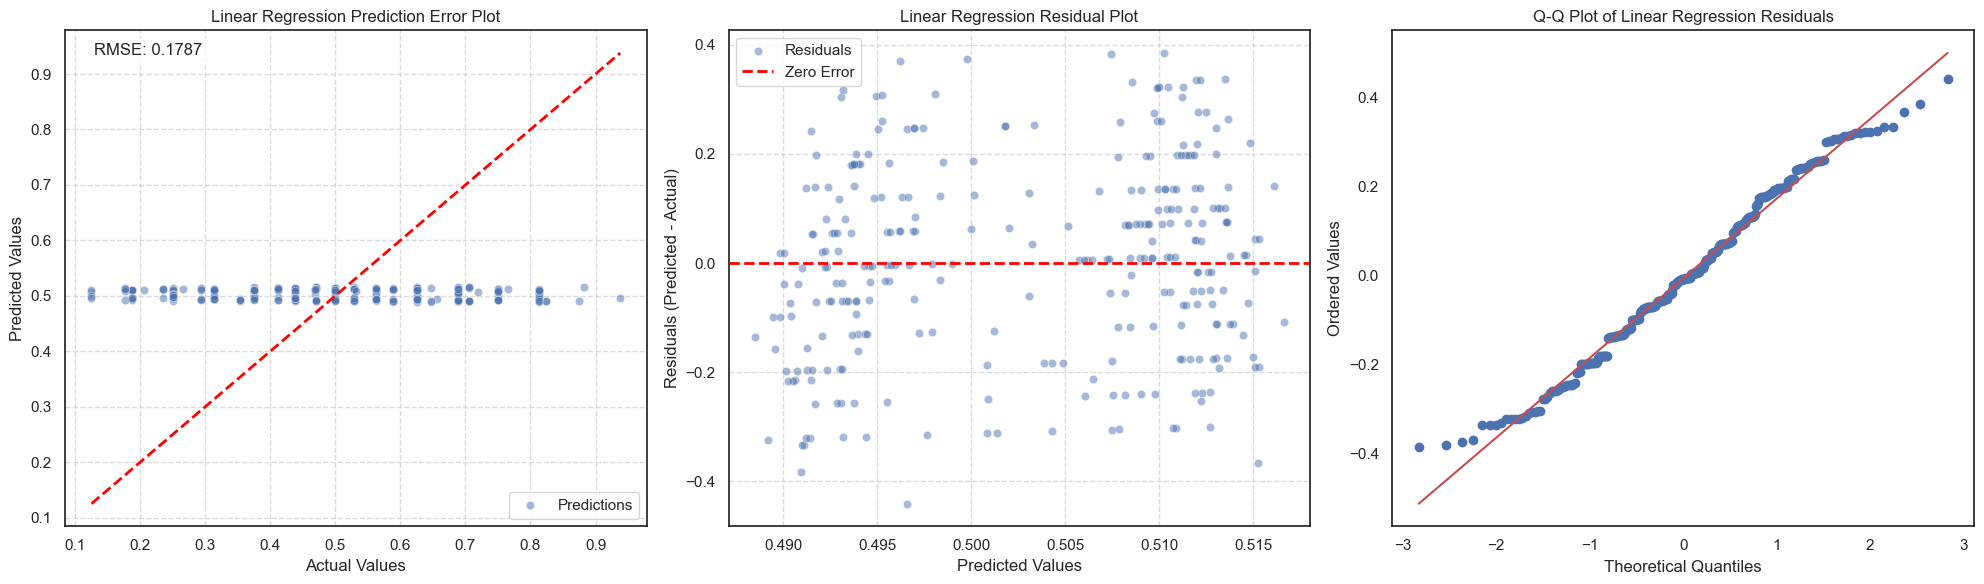

In [344]:
# Assuming y_test and rf_preds are defined from your model
lr_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=lr_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {lr_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Linear Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=lr_preds,
    y=lr_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("Linear Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
lr_resids = y_test - lr_preds
stats.probplot(lr_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of Linear Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")


# Adjust layout
lr_pred_error_residuals_qq_plot.tight_layout()
lr_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/lr_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

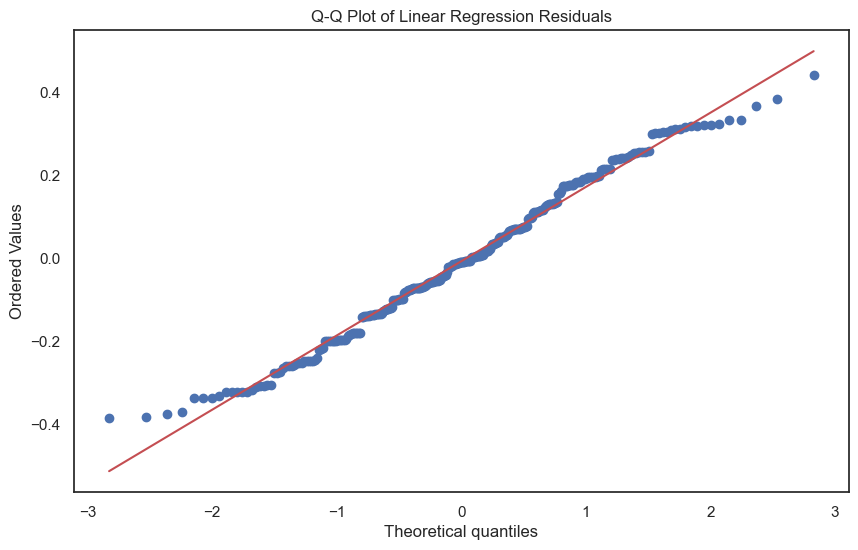

In [345]:
lr_resids = y_test - lr_preds
lr_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(lr_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Linear Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

lr_qq_plot.savefig(f'{project_data_exports_path}/lr_qq_plot.png', dpi=300, bbox_inches='tight')

# KNN

In [346]:
knn_pipe = Pipeline([
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        numeric_transformer=StandardScaler(),
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features,
        scale_numeric=False,
    )),
    ('regressor', KNeighborsRegressor())
])

knn_pipe.get_params()

knn_params = [
    {
        'regressor__n_neighbors': np.arange(1, 100, 5),
        'regressor__weights': ['uniform', 'distance'],
        'regressor__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']}
]

knn_gs = GridSearchCV(estimator=knn_pipe,
                        param_grid=knn_params,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

knn_scores = cross_val_score(knn_gs,
                               X_train,
                               y_train,
                               cv=10,
                               scoring='neg_mean_squared_error',
                               verbose=1)
knn_rmse_scores = np.sqrt(-knn_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {knn_rmse_scores}")
print(f"Average RMSE from CV: {knn_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {knn_rmse_scores.std():.4f}")

# Fit the model on the training set
knn_gs.fit(X_train, y_train)

# Extract best parameters and model
knn_best_params = knn_gs.best_params_
knn_best_pipe = knn_gs.best_estimator_

# Predict on the test set
knn_preds = knn_gs.predict(X_test)

# Calculate RMSE on the test set
knn_rmse = float(np.sqrt(mean_squared_error(y_test, knn_preds)))

# Report results
print(f"Best Parameters: {knn_best_params}")
print(f"Test RMSE: {knn_rmse:.4f}")

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 160 candidates, totalling 800 fits
Cross-Validation RMSE Scores: [0.15112035 0.16603169 0.18234687 0.15291902 0.17840686 0.14556911
 0.17997625 0.16540905 0.17596175 0.15699567]
Average RMSE from CV: 0.1655
Standard Deviation of RMSE from CV: 0.0127
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'regressor__metric': 'chebyshev', 'regressor__n_neighbors': 66, 'regressor__weights': 'distance'}
Test RMSE: 0.1567


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [347]:
joblib.dump(knn_gs, project_pt_1_models_path / 'knn_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/knn_model.pkl']

In [348]:
# Generate learning curve data

# knn_train_sizes_1, knn_train_scores_1, knn_test_scores_1 = learning_curve(
#     knn_pipe_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# knn_train_rmse_1 = np.sqrt(-knn_train_scores_1)
# knn_test_rmse_1 = np.sqrt(-knn_test_scores_1)


In [349]:
# Plot the learning curve
# knn_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=knn_train_sizes_1, y=knn_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=knn_train_sizes_1, y=knn_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     knn_train_sizes_1,
#     knn_train_rmse_1.mean(axis=1) - knn_train_rmse_1.std(axis=1),
#     knn_train_rmse_1.mean(axis=1) + knn_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     knn_train_sizes_1,
#     knn_test_rmse_1.mean(axis=1) - knn_test_rmse_1.std(axis=1),
#     knn_test_rmse_1.mean(axis=1) + knn_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for KNearest Neighbor Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# knn_learning_curve_plot_1.tight_layout()
# knn_learning_curve_plot_1.savefig(f'{project_data_exports_path}/knn_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

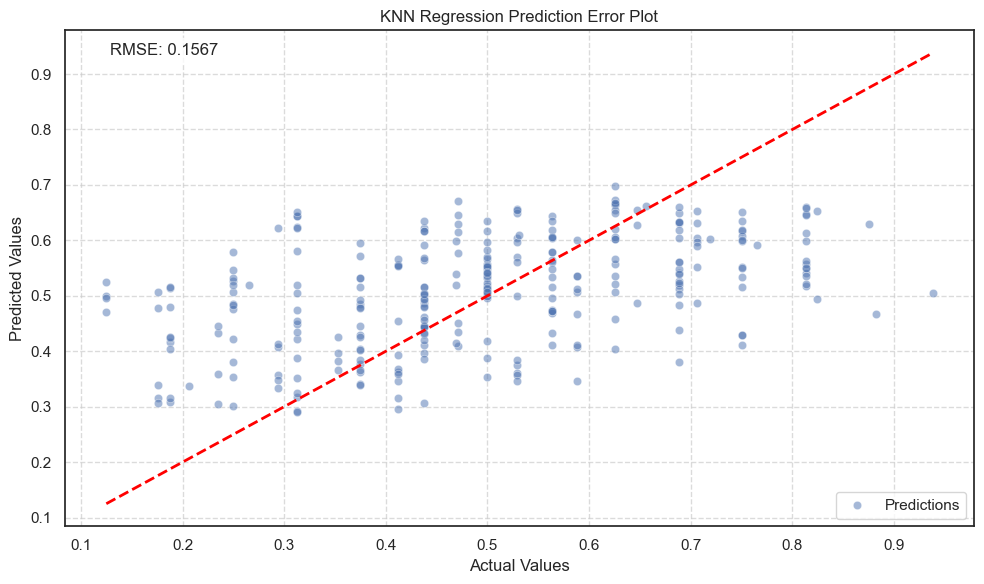

In [350]:
# Actual vs. Predicted
knn_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=knn_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {knn_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("KNN Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

knn_pred_error_plot.tight_layout()

knn_pred_error_plot.savefig(f'{project_data_exports_path}/knn_pred_error_plot.png', dpi=300, bbox_inches='tight')

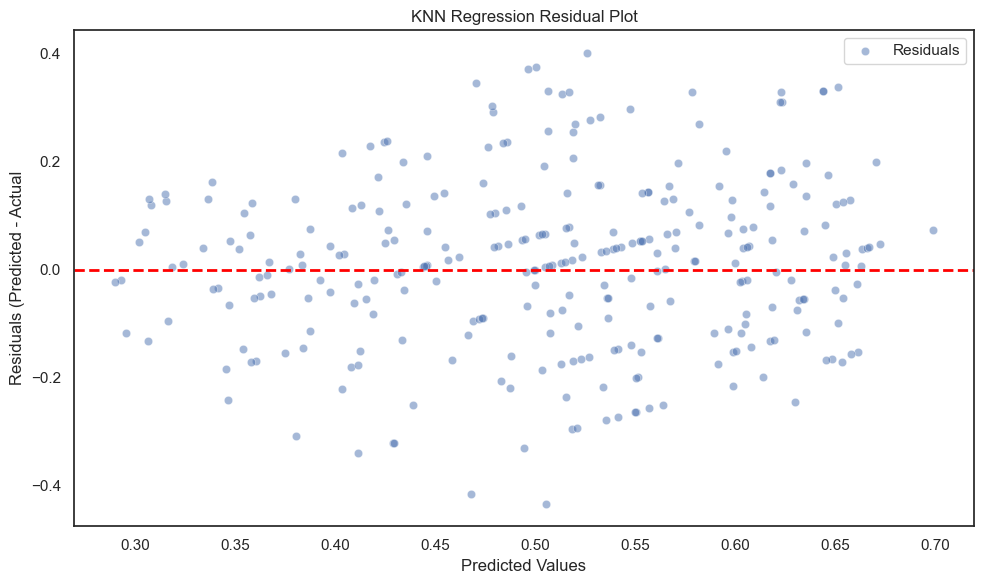

In [351]:
# Residual Plot
knn_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=knn_preds,
    y=knn_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("KNN Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
knn_residuals_plot.tight_layout()

knn_residuals_plot.savefig(f'{project_data_exports_path}/knn_residuals_plot.png', dpi=300, bbox_inches='tight')

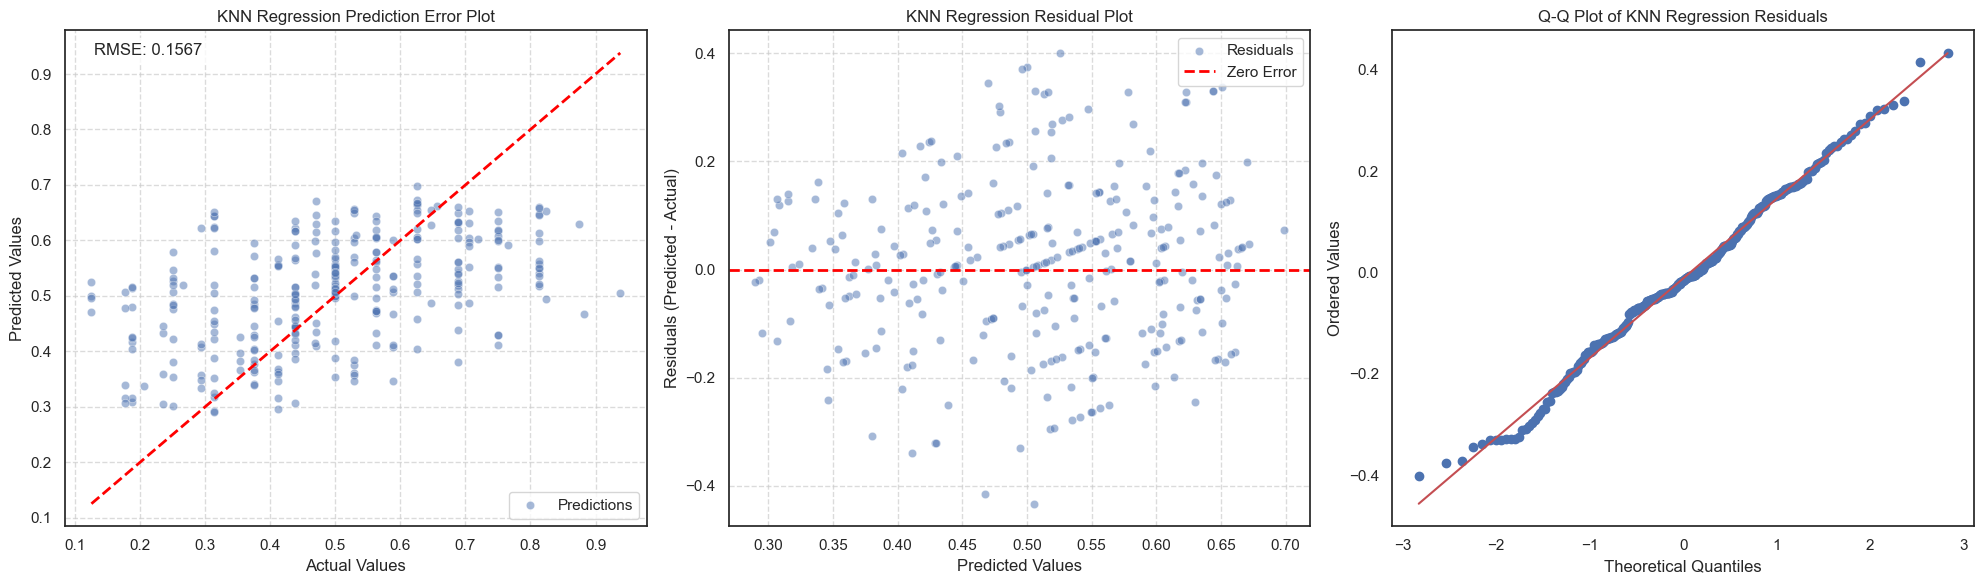

In [352]:
# Assuming y_test and rf_preds are defined from your model
knn_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=knn_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {knn_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("KNN Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=knn_preds,
    y=knn_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("KNN Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
knn_resids = y_test - knn_preds
stats.probplot(knn_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of KNN Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")

# Adjust layout
knn_pred_error_residuals_qq_plot.tight_layout()
knn_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/knn_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

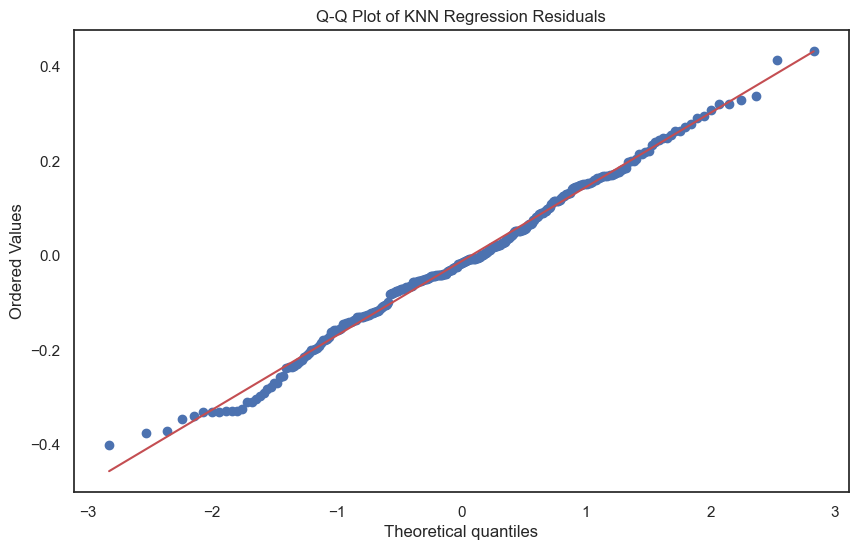

In [353]:
knn_resids = y_test - knn_preds
knn_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(knn_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of KNN Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

knn_qq_plot.savefig(f'{project_data_exports_path}/knn_qq_plot.png', dpi=300, bbox_inches='tight')

# Decision Tree

In [354]:
tree_pipe = Pipeline([
    ('preprocessor', create_preprocessor(
        is_tree_based=True,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', DecisionTreeRegressor())
])

tree_pipe.get_params()

tree_params = [
    {
        'regressor__max_depth': [3, 4, 5],
        'regressor__min_samples_split': np.arange(5, 32, 2),
        'regressor__min_samples_leaf': np.arange(5, 52, 2),
    }]

tree_gs = GridSearchCV(estimator=tree_pipe,
                         param_grid=tree_params,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         verbose=1)

# Fit the model on the training set
tree_gs.fit(X_train, y_train)

# Extract best parameters and model
tree_best_params = tree_gs.best_params_
tree_best_pipe = tree_gs.best_estimator_

# Perform additional cross-validation on the best estimator (optional, with 10 folds)
tree_scores = cross_val_score(
    tree_best_pipe,  # Use the best estimator instead of unfitted tree_gs
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
tree_rmse_scores = np.sqrt(-tree_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {tree_rmse_scores}")
print(f"Average RMSE from CV: {tree_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {tree_rmse_scores.std():.4f}")

# Predict on the test set
tree_preds = tree_gs.predict(X_test)

# Calculate RMSE on the test set
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_preds))

# Report results
print(f"Best Parameters: {tree_best_params}")
print(f"Test RMSE: {tree_rmse:.4f}")

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
Cross-Validation RMSE Scores: [0.15277195 0.16953389 0.18988413 0.15047113 0.17827611 0.14834819
 0.18390639 0.17061755 0.18053028 0.15938231]
Average RMSE from CV: 0.1684
Standard Deviation of RMSE from CV: 0.0141
Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 35, 'regressor__min_samples_split': 15}
Test RMSE: 0.1642


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [355]:
joblib.dump(tree_gs, project_pt_1_models_path / 'tree_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/tree_model.pkl']

In [356]:
# Extract the trained DecisionTreeRegressor
optimized_tree = tree_best_pipe.named_steps['regressor']

# Access the parameters of the optimized tree
best_tree_params = optimized_tree.get_params()

# Display the best parameters
print("Best Parameters for the Decision Tree:")
for param, value in best_tree_params.items():
    print(f"{param}: {value}")

Best Parameters for the Decision Tree:
ccp_alpha: 0.0
criterion: squared_error
max_depth: 5
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 35
min_samples_split: 15
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: None
splitter: best


In [357]:
# Get feature importances
tree_feature_importances = optimized_tree.feature_importances_

# Get feature names from the fitted preprocessor
tree_preprocessor = tree_best_pipe.named_steps['preprocessor']
tree_feature_names = tree_preprocessor.get_feature_names_out()

# Create a DataFrame for feature importances
tree_importance_df = pd.DataFrame({
    'Feature': tree_feature_names,
    'Importance': tree_feature_importances
}).sort_values(by='Importance', ascending=False)


# Display the feature importances
print("Feature Importances:")
print(tree_importance_df)

Feature Importances:
                  Feature  Importance
0       num__cap_hit_prop    0.902562
1  num__player_count_prop    0.097438


In [358]:
# Print the tree structure as text
tree_text = export_text(optimized_tree, feature_names=tree_feature_names)
print("\nDecision Tree Structure:")
print(tree_text)


Decision Tree Structure:
|--- num__cap_hit_prop <= 0.75
|   |--- num__cap_hit_prop <= 0.27
|   |   |--- num__cap_hit_prop <= 0.21
|   |   |   |--- num__player_count_prop <= 0.52
|   |   |   |   |--- value: [0.54]
|   |   |   |--- num__player_count_prop >  0.52
|   |   |   |   |--- value: [0.66]
|   |   |--- num__cap_hit_prop >  0.21
|   |   |   |--- value: [0.54]
|   |--- num__cap_hit_prop >  0.27
|   |   |--- num__cap_hit_prop <= 0.65
|   |   |   |--- num__cap_hit_prop <= 0.35
|   |   |   |   |--- num__cap_hit_prop <= 0.30
|   |   |   |   |   |--- value: [0.44]
|   |   |   |   |--- num__cap_hit_prop >  0.30
|   |   |   |   |   |--- value: [0.50]
|   |   |   |--- num__cap_hit_prop >  0.35
|   |   |   |   |--- num__cap_hit_prop <= 0.43
|   |   |   |   |   |--- value: [0.37]
|   |   |   |   |--- num__cap_hit_prop >  0.43
|   |   |   |   |   |--- value: [0.32]
|   |   |--- num__cap_hit_prop >  0.65
|   |   |   |--- num__player_count_prop <= 0.37
|   |   |   |   |--- value: [0.52]
|   |  

In [359]:
# Generate learning curve data

# tree_train_sizes_1, tree_train_scores_1, tree_test_scores_1 = learning_curve(
#     tree_pipe_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# tree_train_rmse_1 = np.sqrt(-tree_train_scores_1)
# tree_test_rmse_1 = np.sqrt(-tree_test_scores_1)


In [360]:
# Plot the learning curve
# tree_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=tree_train_sizes_1, y=tree_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=tree_train_sizes_1, y=tree_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     tree_train_sizes_1,
#     tree_train_rmse_1.mean(axis=1) - tree_train_rmse_1.std(axis=1),
#     tree_train_rmse_1.mean(axis=1) + tree_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     tree_train_sizes_1,
#     tree_test_rmse_1.mean(axis=1) - tree_test_rmse_1.std(axis=1),
#     tree_test_rmse_1.mean(axis=1) + tree_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for Decision Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# tree_learning_curve_plot_1.tight_layout()
# tree_learning_curve_plot_1.savefig(f'{project_data_exports_path}/tree_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

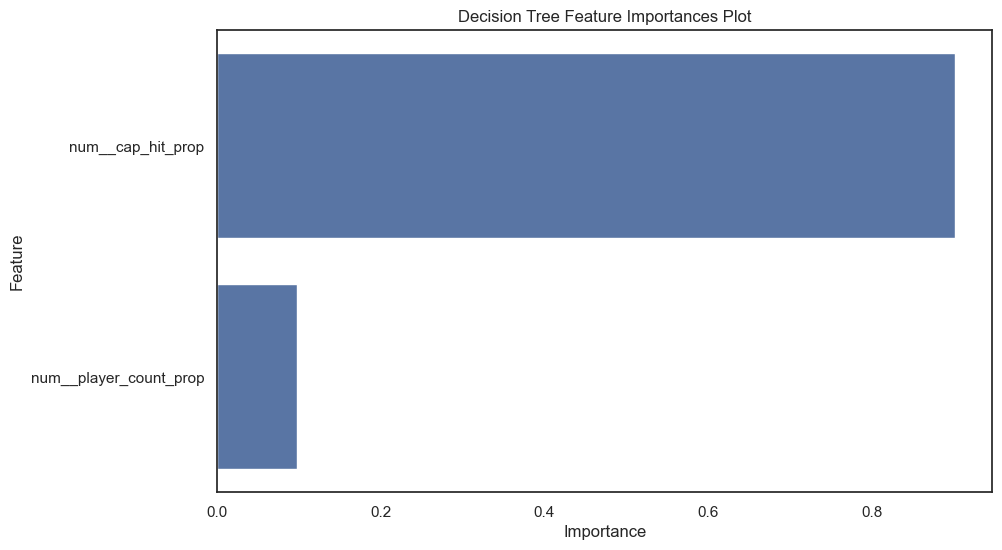

In [361]:
tree_feat_imp_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
sns.barplot(
    data=tree_importance_df,
    x='Importance',
    y='Feature',
    ax=ax
)
ax.set_title("Decision Tree Feature Importances Plot")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

tree_feat_imp_plot.savefig(f'{project_data_exports_path}/tree_feat_imp_plot.png', dpi=300, bbox_inches='tight')

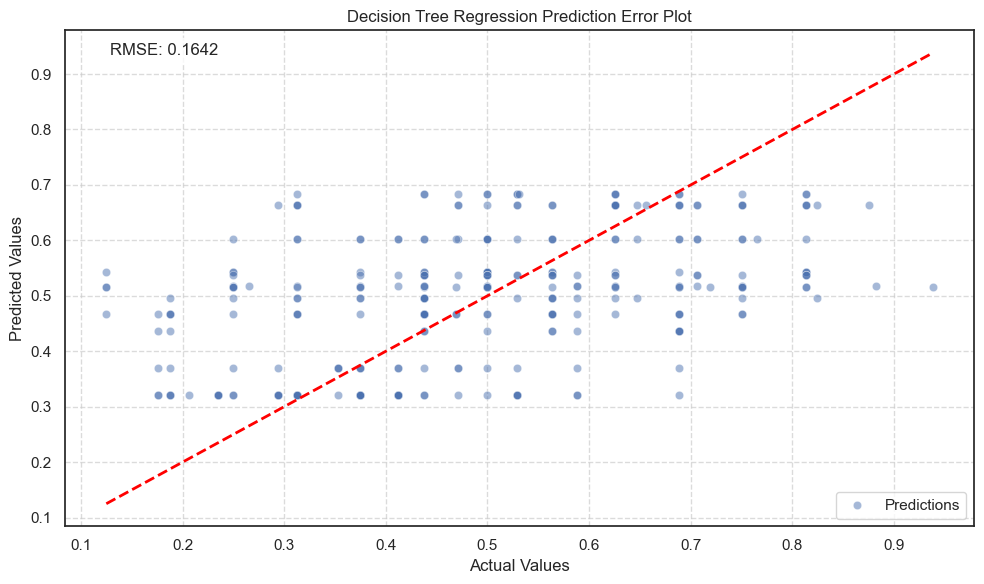

In [362]:
tree_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=tree_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {tree_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Decision Tree Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

tree_pred_error_plot.tight_layout()

tree_pred_error_plot.savefig(f'{project_data_exports_path}/tree_pred_error_plot.png', dpi=300, bbox_inches='tight')

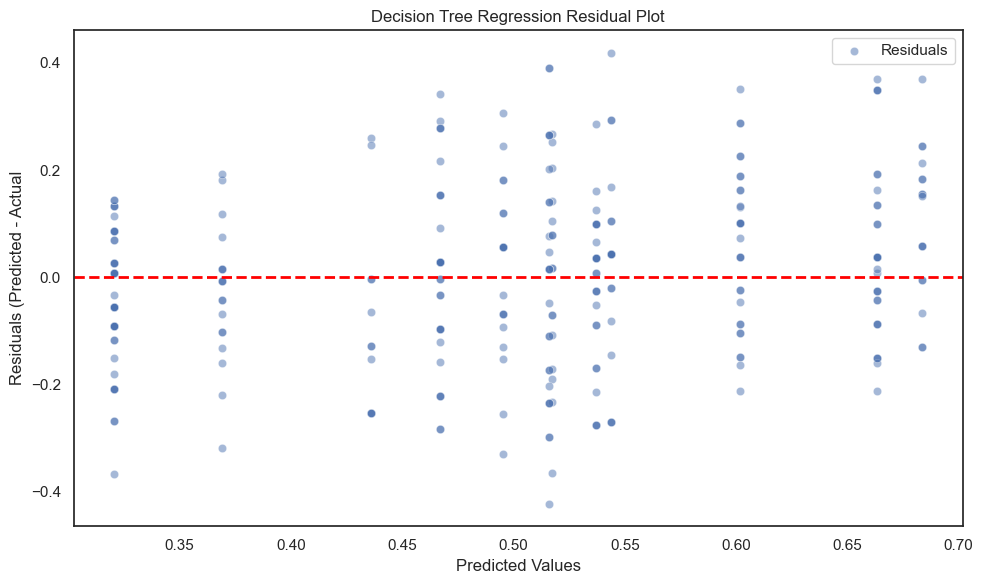

In [363]:
tree_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=tree_preds,
    y=tree_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("Decision Tree Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
tree_residuals_plot.tight_layout()

tree_residuals_plot.savefig(f'{project_data_exports_path}/tree_residuals_plot.png', dpi=300, bbox_inches='tight')

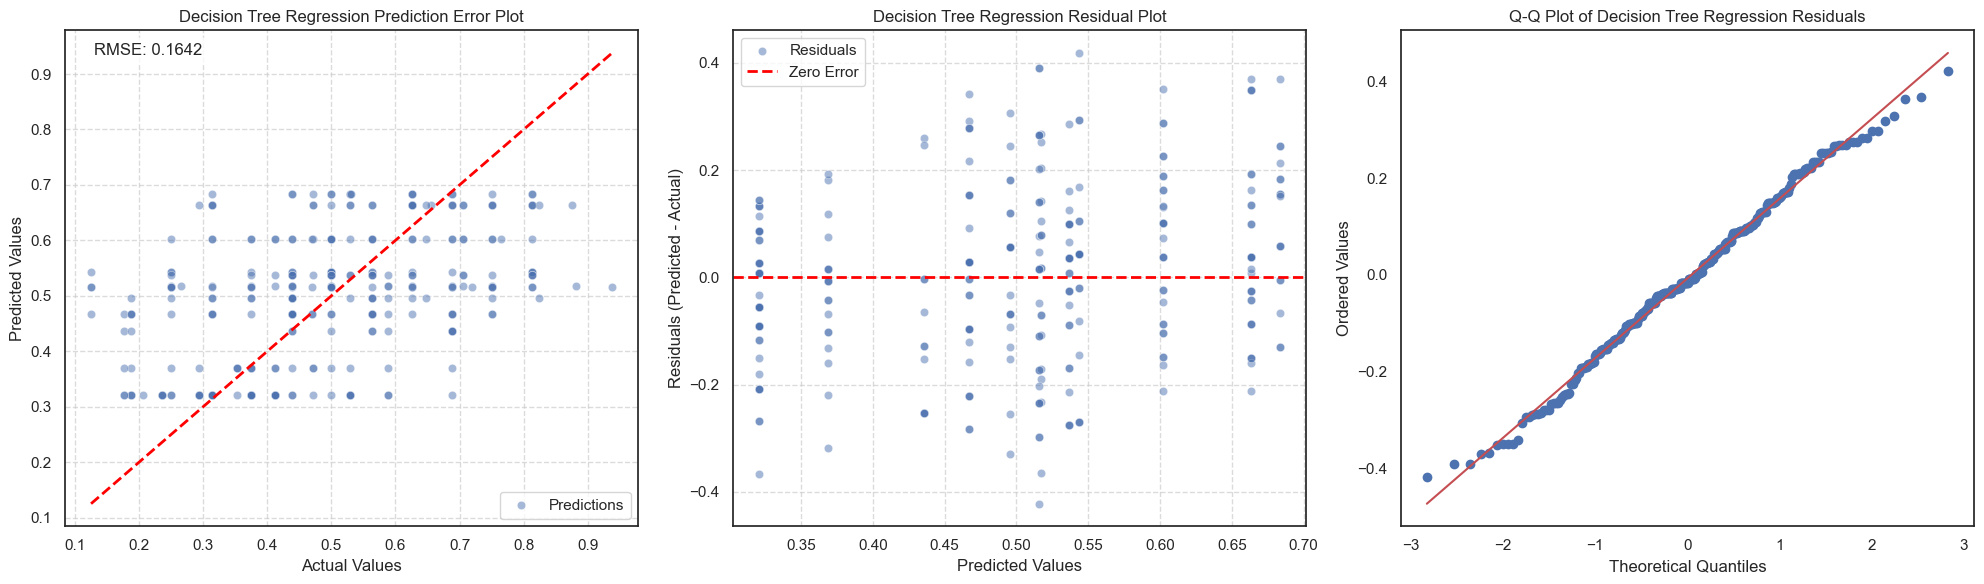

In [364]:
# Assuming y_test and rf_preds are defined from your model
tree_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=tree_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {tree_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Decision Tree Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=tree_preds,
    y=tree_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("Decision Tree Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
tree_resids = y_test - tree_preds
stats.probplot(tree_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of Decision Tree Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")

# Adjust layout
tree_pred_error_residuals_qq_plot.tight_layout()
tree_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/tree_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

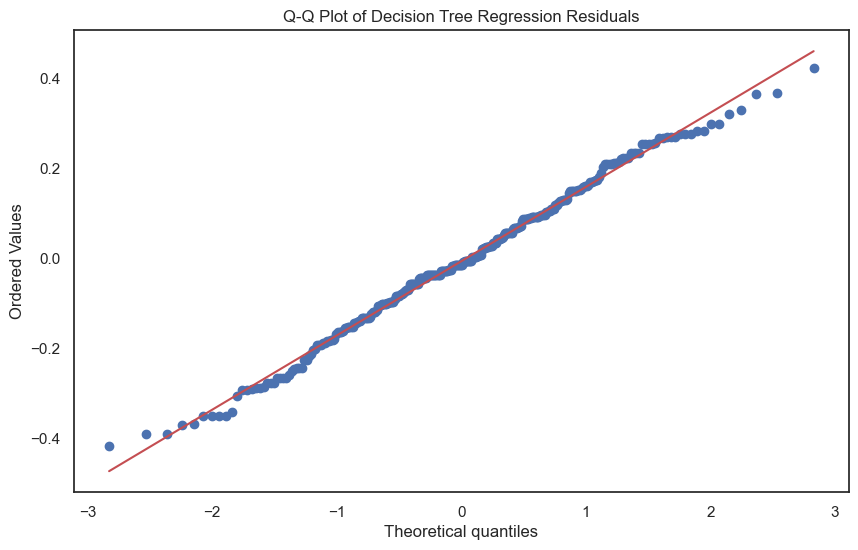

In [365]:
tree_resids = y_test - tree_preds
tree_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(tree_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Decision Tree Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

tree_qq_plot.savefig(f'{project_data_exports_path}/tree_qq_plot.png', dpi=300, bbox_inches='tight')

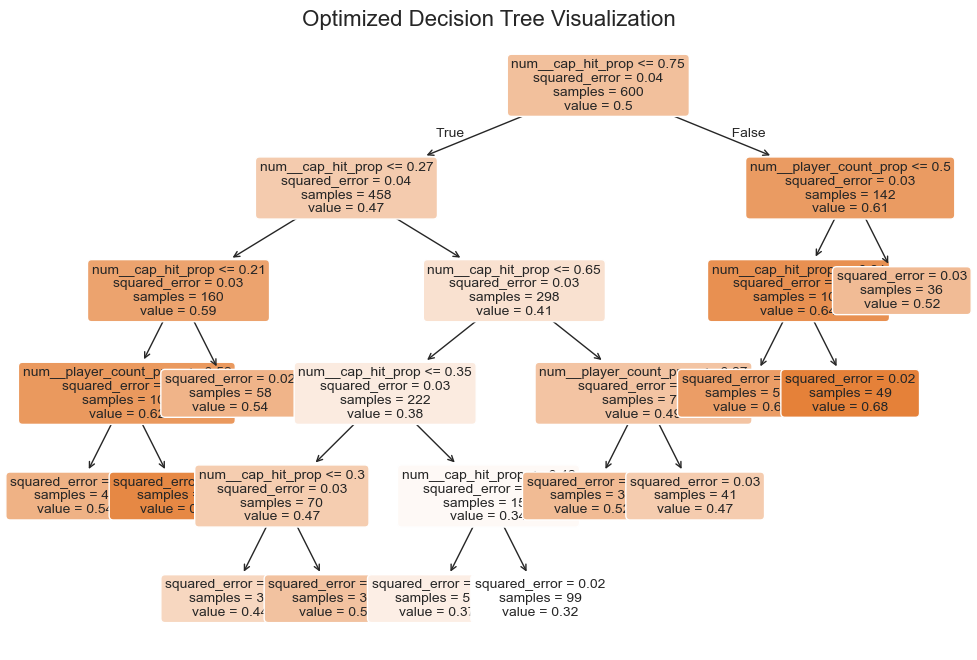

In [366]:
# Create the figure and axis
tree_plot, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize for clarity

# Plot the decision tree
plot_tree(
    tree_best_pipe.named_steps['regressor'],
    feature_names=tree_feature_names,  # Use feature names for clarity
    filled=True,  # Color the nodes based on the output value
    rounded=True,  # Use rounded nodes for better readability
    fontsize=10,  # Adjust font size
    precision=2,
    ax=ax  # Pass the axis for plotting
)

# Add a title to the plot
ax.set_title("Optimized Decision Tree Visualization", fontsize=16)
tree_plot.savefig(f'{project_data_exports_path}/tree_plot.png', dpi=300, bbox_inches='tight')

# Random Forests

In [367]:
rf_pipe = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=True,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', RandomForestRegressor())
])
rf_pipe.get_params()

rf_params = [
    {
        'regressor__n_estimators': [100, 250],
        'regressor__max_depth': [3, 5, 10],
        'regressor__min_samples_split': np.arange(5, 31, 5),
        'regressor__min_samples_leaf': np.arange(5, 51, 5),
    }]

rf_gs = GridSearchCV(estimator=rf_pipe,
                       param_grid=rf_params,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1)

# Calculate RMSE using cross_val_score
rf_scores = cross_val_score(
    rf_gs,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
rf_rmse_scores = np.sqrt(-rf_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {rf_rmse_scores}")
print(f"Average RMSE from CV: {rf_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {rf_rmse_scores.std():.4f}")

# Fit the model on the training set
rf_gs.fit(X_train, y_train)

# Extract best parameters and model
rf_best_params = rf_gs.best_params_
rf_best_pipe = rf_gs.best_estimator_

# Predict on the test set
rf_preds = rf_gs.predict(X_test)

# Calculate RMSE on the test set
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

# Report results
print(f"Best Parameters: {rf_best_params}")
print(f"Test RMSE: {rf_rmse:.4f}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Cross-Validation RMSE Scores: [0.15496684 0.16976657 0.18510588 0.15328281 0.18110145 0.14274238
 0.17987661 0.16026509 0.18346722 0.15424366]
Average RMSE from CV: 0.1665
Standard Deviation of RMSE from CV: 0.0145
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 20, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 250}
Test RMSE: 0.1604


In [368]:
joblib.dump(rf_gs, project_pt_1_models_path / 'rf_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/rf_model.pkl']

In [369]:
# Extract the trained DecisionTreeRegressor
optimized_rf = rf_best_pipe.named_steps['regressor']

# Access the parameters of the optimized tree
best_rf_params = optimized_rf.get_params()

# Display the best parameters
print("Best Parameters for the Decision Tree:")
for param, value in best_rf_params.items():
    print(f"{param}: {value}")

Best Parameters for the Decision Tree:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: 10
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 20
min_samples_split: 10
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 250
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [370]:
# Get feature importance scores
rf_feature_importances = optimized_rf.feature_importances_

# Get feature names from the fitted preprocessor
rf_preprocessor = rf_best_pipe.named_steps['preprocessor']
rf_feature_names = rf_preprocessor.get_feature_names_out()

# Debug: Print lengths to diagnose mismatch
print(f"Length of rf_feature_names: {len(rf_feature_names)}")
print(f"Length of rf_feature_importances: {len(rf_feature_importances)}")
print(f"rf_feature_names: {rf_feature_names}")
print(f"rf_feature_importances: {rf_feature_importances}")

# Create a DataFrame for feature importances, ensuring alignment
if len(rf_feature_names) != len(rf_feature_importances):
    print("Warning: Mismatch in feature names and importances. Using original feature names.")
    rf_feature_names = [f'num__{name}' for name in selected_numeric_features]
rf_importance_df = pd.DataFrame({
    'Feature': rf_feature_names,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Combine with feature names (including those created by OneHotEncoder)
# rf_preprocessed_features = rf_best_pipe.named_steps['preprocessor'].transformers_

# rf_categorical_features = rf_best_pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()

# rf_all_features = list(selected_numeric_features) + list(rf_categorical_features)

# Create a DataFrame for readability
# rf_importance_df = pd.DataFrame({
#     'Feature': rf_all_features,
#     'Importance': rf_feature_importances
# }).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(rf_importance_df)

Length of rf_feature_names: 2
Length of rf_feature_importances: 2
rf_feature_names: ['num__cap_hit_prop' 'num__player_count_prop']
rf_feature_importances: [0.86341197 0.13658803]
Feature Importances:
                  Feature  Importance
0       num__cap_hit_prop    0.863412
1  num__player_count_prop    0.136588


In [371]:
# Generate learning curve data

# rf_train_sizes_1, rf_train_scores_1, rf_test_scores_1 = learning_curve(
#     rf_pipe_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# rf_train_rmse_1 = np.sqrt(-rf_train_scores_1)
# rf_test_rmse_1 = np.sqrt(-rf_test_scores_1)



In [372]:
# Plot the learning curve
# rf_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=rf_train_sizes_1, y=rf_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=rf_train_sizes_1, y=rf_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     rf_train_sizes_1,
#     rf_train_rmse_1.mean(axis=1) - rf_train_rmse_1.std(axis=1),
#     rf_train_rmse_1.mean(axis=1) + rf_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     rf_train_sizes_1,
#     rf_test_rmse_1.mean(axis=1) - rf_test_rmse_1.std(axis=1),
#     rf_test_rmse_1.mean(axis=1) + rf_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for Random Forest Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# rf_learning_curve_plot_1.tight_layout()
# rf_learning_curve_plot_1.savefig(f'{project_data_exports_path}/rf_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

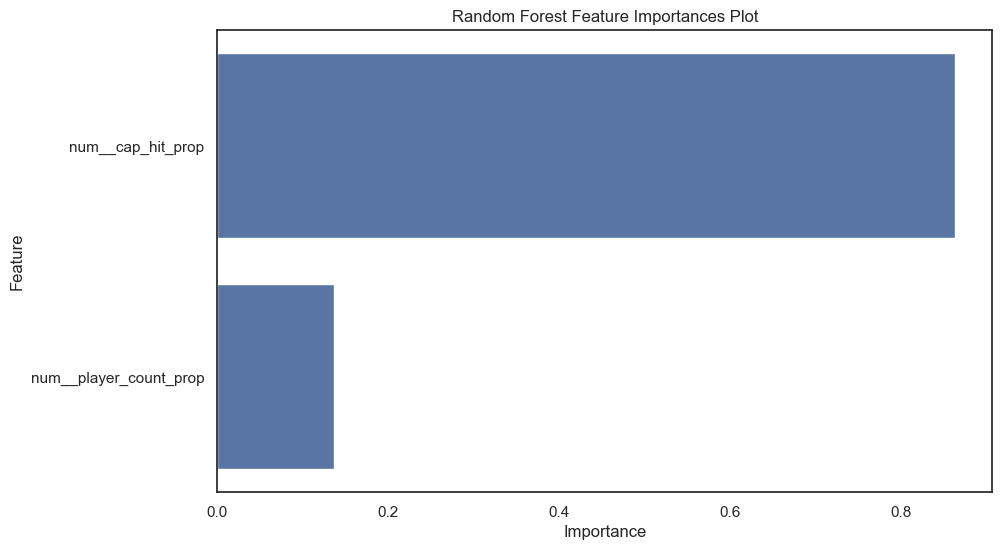

In [373]:
rf_feat_imp_plot, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
sns.barplot(
    data=rf_importance_df,
    x='Importance',
    y='Feature',
    ax=ax
)
ax.set_title("Random Forest Feature Importances Plot")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

rf_feat_imp_plot.savefig(f'{project_data_exports_path}/rf_feat_imp_plot.png', dpi=300, bbox_inches='tight')

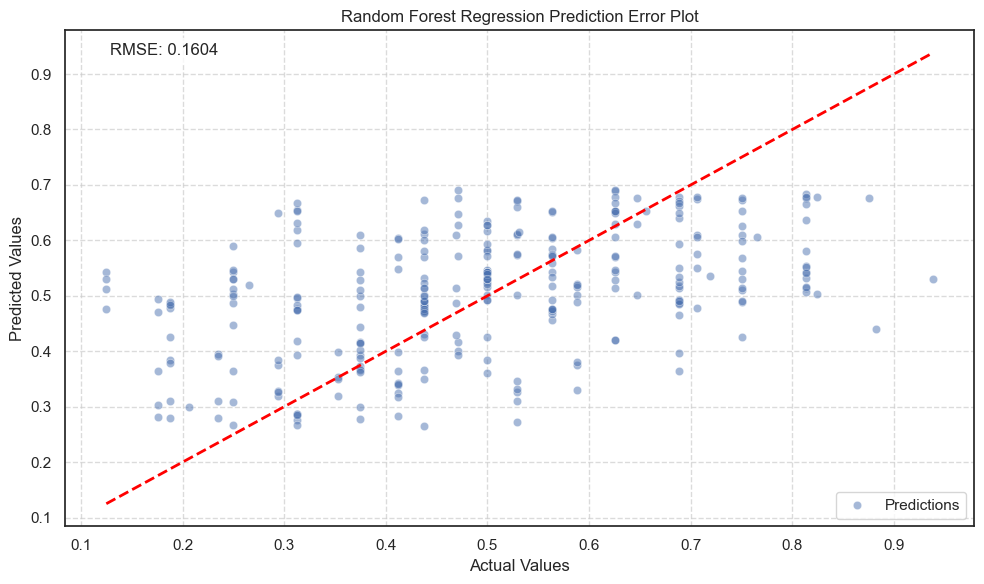

In [374]:
rf_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=rf_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {rf_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Random Forest Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

rf_pred_error_plot.tight_layout()

rf_pred_error_plot.savefig(f'{project_data_exports_path}/rf_pred_error_plot.png', dpi=300, bbox_inches='tight')

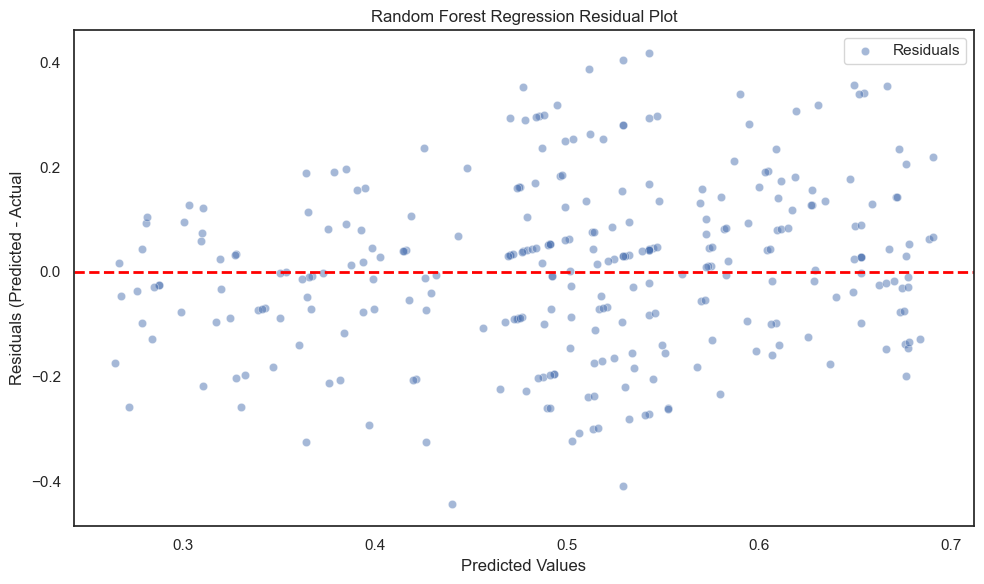

In [375]:
rf_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=rf_preds,
    y=rf_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("Random Forest Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
rf_residuals_plot.tight_layout()

rf_residuals_plot.savefig(f'{project_data_exports_path}/rf_residuals_plot.png', dpi=300, bbox_inches='tight')

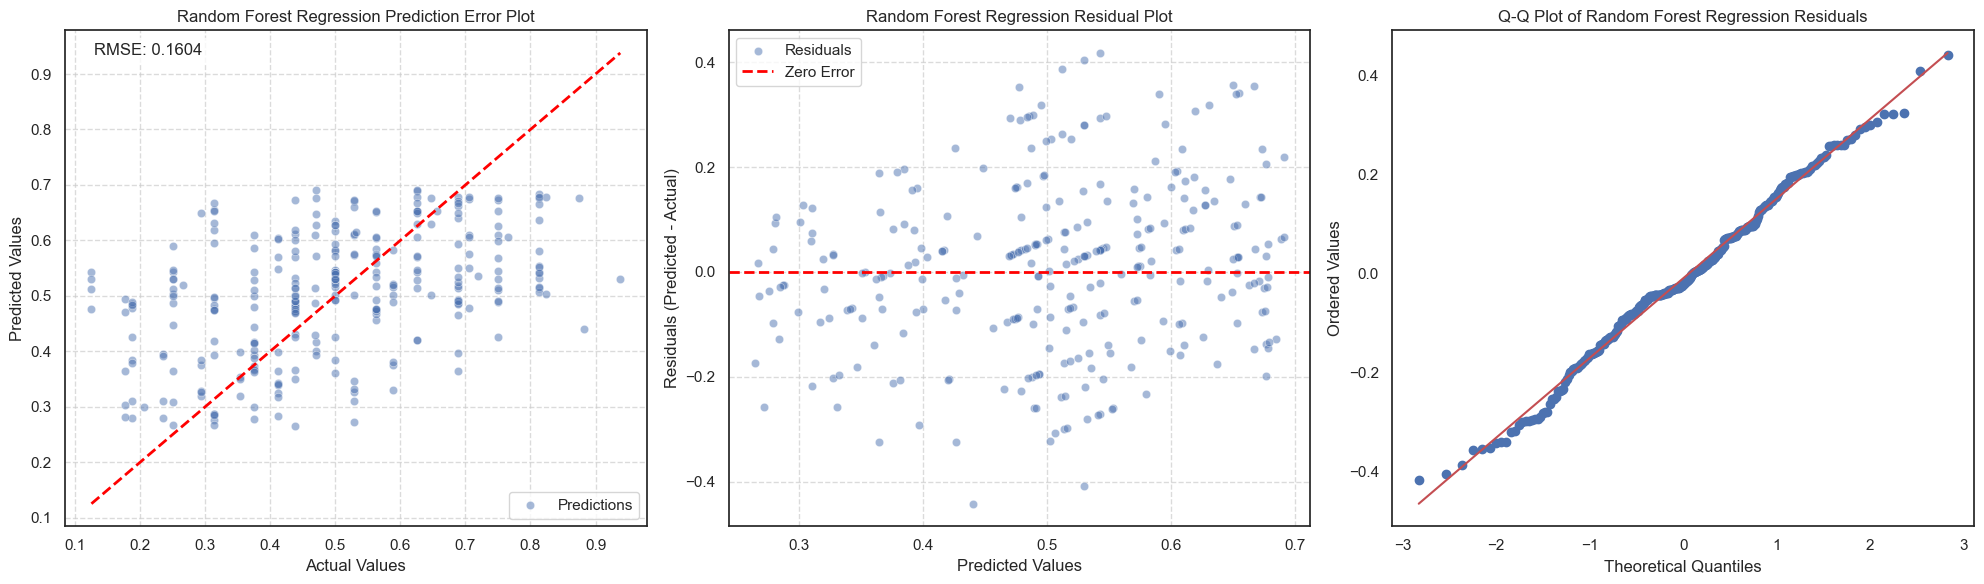

In [376]:
# Assuming y_test and rf_preds are defined from your model
rf_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=rf_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {rf_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Random Forest Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=rf_preds,
    y=rf_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("Random Forest Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
rf_resids = y_test - rf_preds
stats.probplot(rf_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of Random Forest Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")

# Adjust layout
rf_pred_error_residuals_qq_plot.tight_layout()
rf_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/rf_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

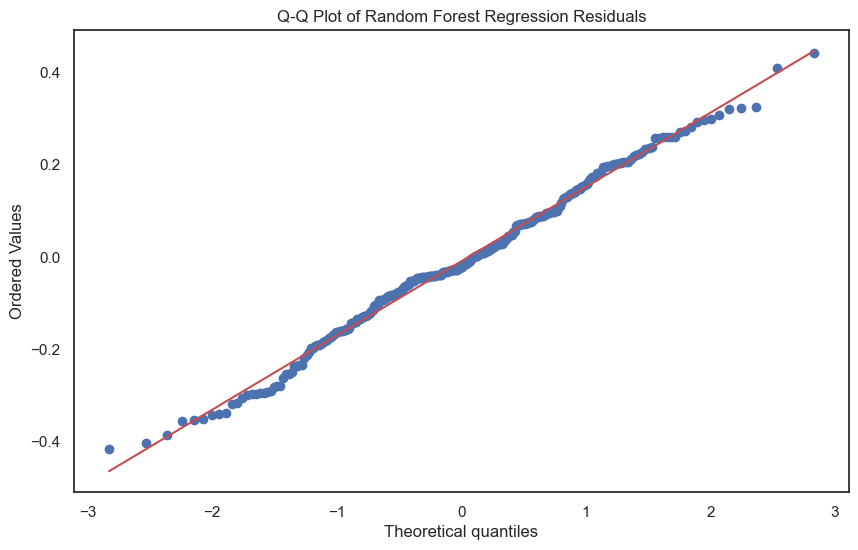

In [377]:
rf_resids = y_test - rf_preds
rf_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(rf_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Random Forest Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

rf_qq_plot.savefig(f'{project_data_exports_path}/rf_qq_plot.png', dpi=300, bbox_inches='tight')

# Ridge

In [378]:
ridge_alpha_plot_preprocessor = create_preprocessor(
    is_tree_based=False,
    selected_numeric_features=selected_numeric_features,
    selected_categorical_features=selected_categorical_features,
)# Fit the preprocessor on the training data
ridge_alpha_plot_preprocessor.fit(X_train)

# Get the transformed feature names
ridge_alpha_feature_names_transformed = ridge_alpha_plot_preprocessor.get_feature_names_out()

# Transform the training data
ridge_alpha_X_train_transformed = ridge_alpha_plot_preprocessor.transform(X_train)

# Initialize the dictionary to store coefficients
ridge_alpha_coefficients = {feature: [] for feature in ridge_alpha_feature_names_transformed}
ridge_alpha_coefficients['alpha'] = []

#Define a range of alpha values
n_ridge_alphas = 500
ridge_alpha_values = np.logspace(-5, 5, n_ridge_alphas)


# Fit Ridge regression for each alpha
for alpha in ridge_alpha_values:
    ridge = Ridge(alpha=alpha, fit_intercept=True, max_iter=20000, solver='auto')
    ridge.fit(ridge_alpha_X_train_transformed, y_train)  # Use transformed data
    for i, feature in enumerate(ridge_alpha_feature_names_transformed):
        ridge_alpha_coefficients[feature].append(ridge.coef_[i])
    ridge_alpha_coefficients['alpha'].append(alpha)

ridge_alpha_coefficients_df = pd.DataFrame(ridge_alpha_coefficients)

ridge_alpha_coefficients_df_melted = ridge_alpha_coefficients_df.melt(id_vars='alpha', var_name='Feature', value_name='Coefficient')
ridge_alpha_coefficients_df_melted



,alpha,Feature,Coefficient
0,0.000010,num__cap_hit_prop,0.004308
1,0.000010,num__cap_hit_prop,0.004308
2,0.000011,num__cap_hit_prop,0.004308
3,0.000011,num__cap_hit_prop,0.004308
4,0.000012,num__cap_hit_prop,0.004308
...,...,...,...
995,83145.678058,num__player_count_prop,-0.000055
996,87072.248492,num__player_count_prop,-0.000053
997,91184.251961,num__player_count_prop,-0.000050
998,95490.445575,num__player_count_prop,-0.000048


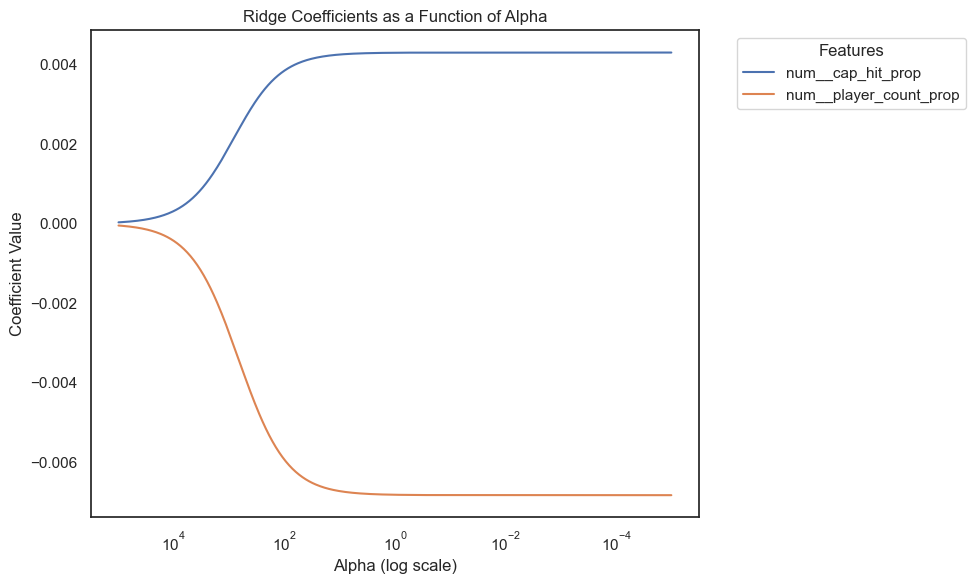

In [379]:
ridge_alpha_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.lineplot(
    data=ridge_alpha_coefficients_df_melted,
    x='alpha',
    y='Coefficient',
    hue='Feature',
    ax=ax)

# Customize the plot
ax.set_xscale('log')  # Use logarithmic scale for alpha
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_title('Ridge Coefficients as a Function of Alpha')
ax.set_xlabel('Alpha (log scale)')
ax.set_ylabel('Coefficient Value')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

ridge_alpha_plot.tight_layout()
ridge_alpha_plot.savefig(f'{project_data_exports_path}/ridge_alpha_plot.png', dpi=300, bbox_inches='tight')

In [380]:
ridge_pipe = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features,
        scale_numeric=True,
    )),
    ('regressor', Ridge())
])

ridge_pipe.get_params()

ridge_params = [
    {
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],  # Test different scalers
        # 'preprocessor__polynomials__poly__degree': [1, 2, 3],  # Test polynomial degrees
        'regressor__alpha': np.logspace(1, 4, 100),  # Regularization strength
        'regressor__fit_intercept': [True, False],
        'regressor__solver': ['auto', 'lsqr', 'sag', 'saga'],
        'regressor__max_iter': [20000]
    }
]

ridge_gs = GridSearchCV(estimator=ridge_pipe,
                        param_grid=ridge_params,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

# Calculate RMSE using cross_val_score
ridge_scores = cross_val_score(
    ridge_gs,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
ridge_rmse_scores = np.sqrt(-ridge_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {ridge_rmse_scores}")
print(f"Average RMSE from CV: {ridge_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {ridge_rmse_scores.std():.4f}")

# Fit the model on the training set
ridge_gs.fit(X_train, y_train)

# Extract best parameters and model
ridge_best_params = ridge_gs.best_params_
ridge_best_pipe = ridge_gs.best_estimator_

# Predict on the test set
ridge_preds = ridge_gs.predict(X_test)

# Calculate RMSE on the test set
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))

# Report results
print(f"Best Parameters: {ridge_best_params}")
print(f"Test RMSE: {ridge_rmse:.4f}")

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Cross-Validation RMSE Scores: [0.18086908 0.19589181 0.21067726 0.19216088 0.20564498 0.18226387
 0.21420576 0.21287964 0.19389283 0.18552305]
Average RMSE from CV: 0.1974
Standard Deviation of RMSE from CV: 0.0120
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best Parameters: {'preprocessor__num': StandardScaler(), 'regressor__alpha': 132.19411484660287, 'regressor__fit_intercept': True, 'regressor__max_iter': 20000, 'regressor__solver': 'saga'}
Test RMSE: 0.1785


In [381]:
joblib.dump(ridge_gs, project_pt_1_models_path / 'ridge_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/ridge_model.pkl']

In [382]:
# Get the transformed feature names after one-hot encoding and scaling
ridge_feature_names_transformed = ridge_best_pipe.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Ridge Regression model
ridge_coefs = ridge_best_pipe.named_steps['regressor'].coef_.flatten()
ridge_intercept = ridge_best_pipe.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
ridge_coef_df = pd.DataFrame({'Feature': ridge_feature_names_transformed, 'Coefficient': ridge_coefs})

# Add the intercept row
ridge_intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [ridge_intercept]})
ridge_coef_df = pd.concat([ridge_intercept_df, ridge_coef_df], ignore_index=True)

# Display the DataFrame with coefficients
ridge_coef_df.to_csv(f'{project_data_exports_path}/ridge_coef_df.csv')
ridge_coef_df

,Feature,Coefficient
0,Intercept,0.502350
1,num__cap_hit_prop,0.003723
2,num__player_count_prop,-0.005699


In [383]:
# Generate learning curve data

# ridge_train_sizes_1, ridge_train_scores_1, ridge_test_scores_1 = learning_curve(
#     ridge_gs_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# ridge_train_rmse_1 = np.sqrt(-ridge_train_scores_1)
# ridge_test_rmse_1 = np.sqrt(-ridge_test_scores_1)



In [384]:
# Plot the learning curve
# ridge_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=ridge_train_sizes_1, y=ridge_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=ridge_train_sizes_1, y=ridge_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     ridge_train_sizes_1,
#     ridge_train_rmse_1.mean(axis=1) - ridge_train_rmse_1.std(axis=1),
#     ridge_train_rmse_1.mean(axis=1) + ridge_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     ridge_train_sizes_1,
#     ridge_test_rmse_1.mean(axis=1) - ridge_test_rmse_1.std(axis=1),
#     ridge_test_rmse_1.mean(axis=1) + ridge_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for Ridge Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# ridge_learning_curve_plot_1.tight_layout()
# ridge_learning_curve_plot_1.savefig(f'{project_data_exports_path}/ridge_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

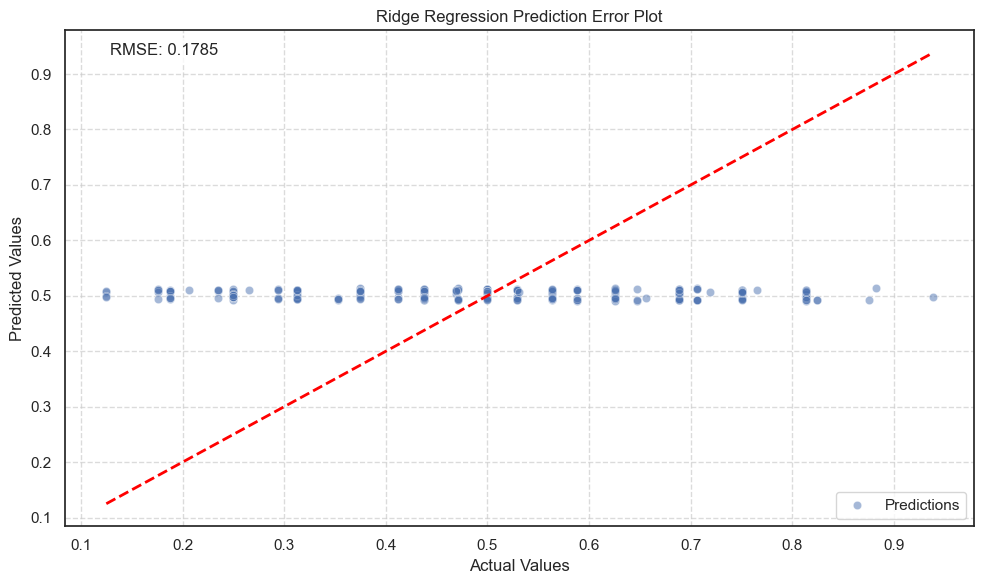

In [385]:
ridge_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=ridge_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {ridge_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Ridge Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

ridge_pred_error_plot.tight_layout()

ridge_pred_error_plot.savefig(f'{project_data_exports_path}/ridge_pred_error_plot.png', dpi=300, bbox_inches='tight')

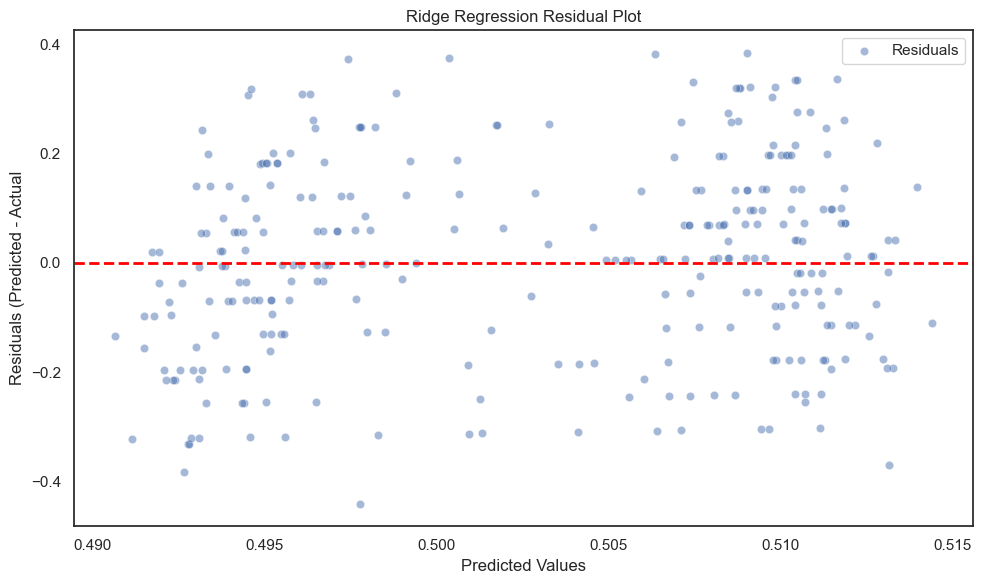

In [386]:
ridge_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=ridge_preds,
    y=ridge_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("Ridge Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
ridge_residuals_plot.tight_layout()

ridge_residuals_plot.savefig(f'{project_data_exports_path}/ridge_residuals_plot.png', dpi=300, bbox_inches='tight')

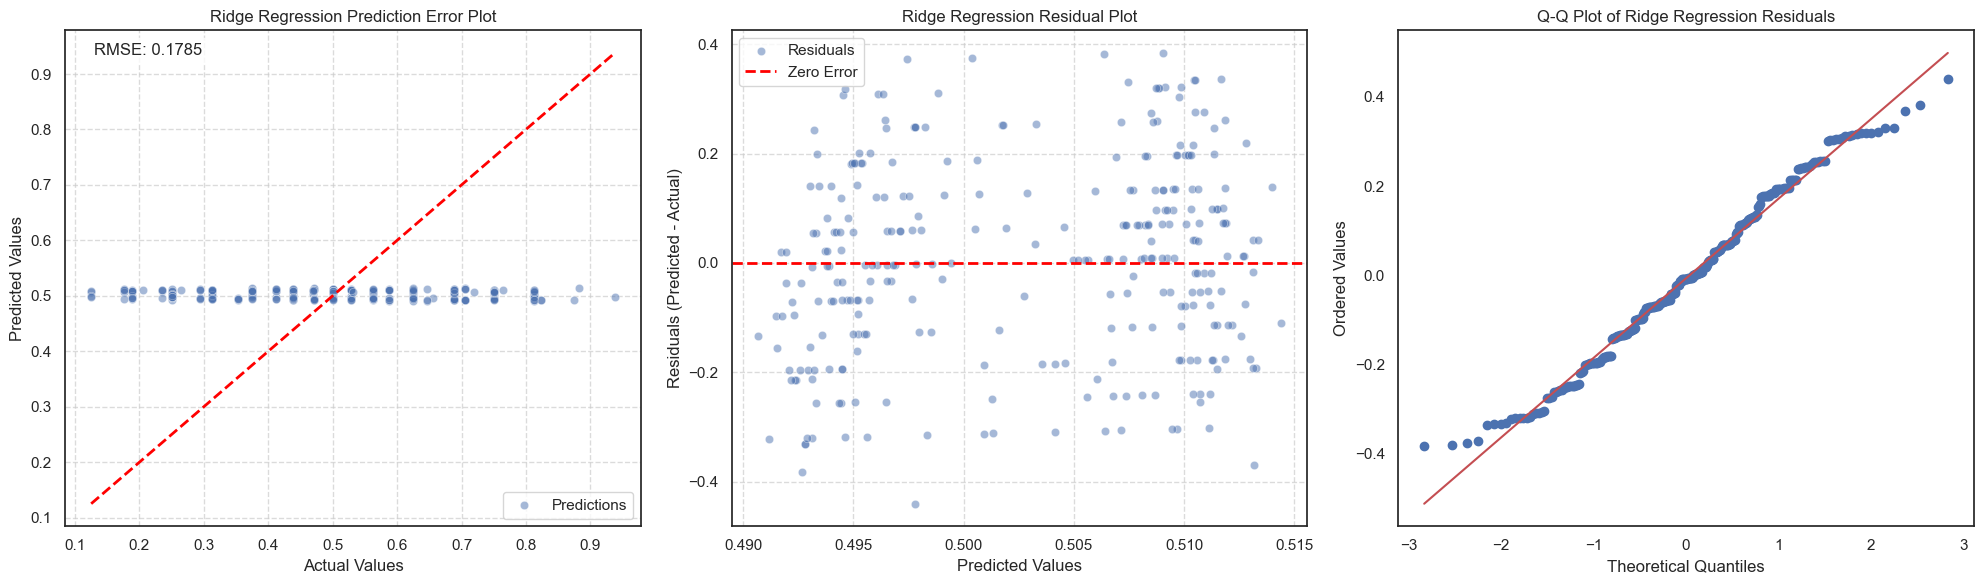

In [387]:
# Assuming y_test and rf_preds are defined from your model
ridge_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=ridge_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {ridge_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Ridge Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=ridge_preds,
    y=ridge_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("Ridge Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
ridge_resids = y_test - ridge_preds
stats.probplot(ridge_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of Ridge Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")

# Adjust layout
ridge_pred_error_residuals_qq_plot.tight_layout()
ridge_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/ridge_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

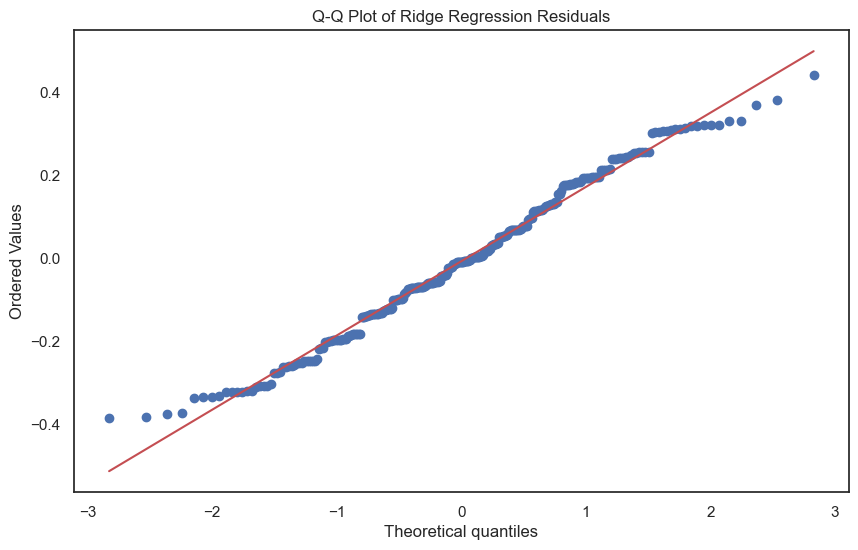

In [388]:
ridge_resids = y_test - ridge_preds
ridge_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(ridge_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Ridge Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

ridge_qq_plot.savefig(f'{project_data_exports_path}/ridge_qq_plot.png', dpi=300, bbox_inches='tight')

# LASSO

In [389]:
lasso_alpha_plot_preprocessor = create_preprocessor(
    is_tree_based=False,
    selected_numeric_features=selected_numeric_features,
    selected_categorical_features=selected_categorical_features,
)

# Fit the preprocessor on the training data
lasso_alpha_plot_preprocessor.fit(X_train)

# Get the transformed feature names
lasso_alpha_feature_names_transformed = lasso_alpha_plot_preprocessor.get_feature_names_out()

# Transform the training data
lasso_alpha_X_train_transformed = lasso_alpha_plot_preprocessor.transform(X_train)

# Initialize the dictionary to store coefficients
lasso_alpha_coefficients = {feature: [] for feature in lasso_alpha_feature_names_transformed}
lasso_alpha_coefficients['alpha'] = []

#Define a range of alpha values
n_lasso_alphas = 1000
lasso_alpha_values = np.logspace(-10, 7, n_lasso_alphas)


# Fit Ridge regression for each alpha
for alpha in lasso_alpha_values:
    lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=20000)
    lasso.fit(lasso_alpha_X_train_transformed, y_train)  # Use transformed data
    for i, feature in enumerate(lasso_alpha_feature_names_transformed):
        lasso_alpha_coefficients[feature].append(lasso.coef_[i])
    lasso_alpha_coefficients['alpha'].append(alpha)

lasso_alpha_coefficients_df = pd.DataFrame(lasso_alpha_coefficients)

lasso_alpha_coefficients_df_melted = lasso_alpha_coefficients_df.melt(id_vars='alpha', var_name='Feature', value_name='Coefficient')
lasso_alpha_coefficients_df_melted

,alpha,Feature,Coefficient
0,1.000000e-10,num__cap_hit_prop,0.004308
1,1.039961e-10,num__cap_hit_prop,0.004308
2,1.081519e-10,num__cap_hit_prop,0.004308
3,1.124737e-10,num__cap_hit_prop,0.004308
4,1.169683e-10,num__cap_hit_prop,0.004308
...,...,...,...
1995,8.549327e+06,num__player_count_prop,-0.000000
1996,8.890966e+06,num__player_count_prop,-0.000000
1997,9.246257e+06,num__player_count_prop,-0.000000
1998,9.615746e+06,num__player_count_prop,-0.000000


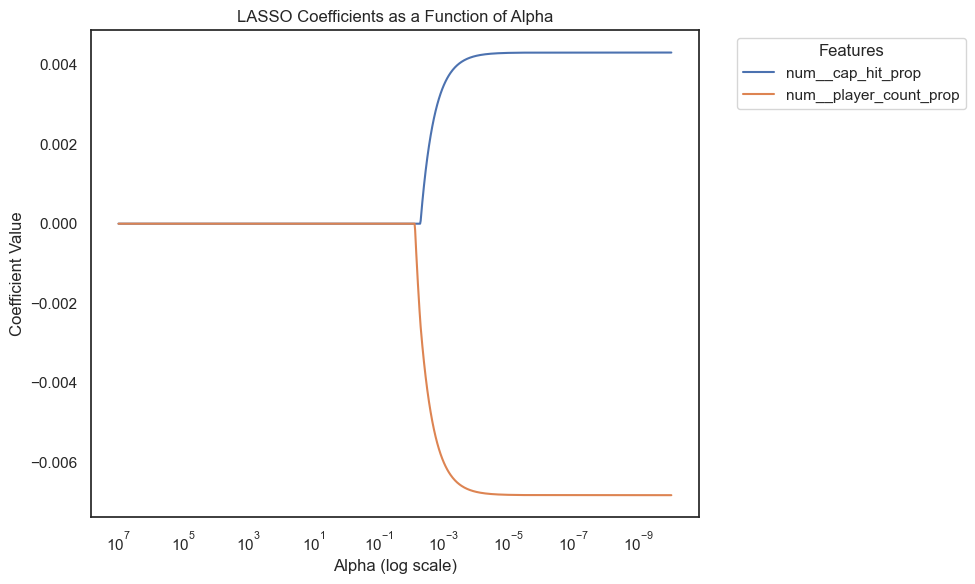

In [390]:
lasso_alpha_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.lineplot(
    data=lasso_alpha_coefficients_df_melted,
    x='alpha',
    y='Coefficient',
    hue='Feature',
    ax=ax)

# Customize the plot
ax.set_xscale('log')  # Use logarithmic scale for alpha
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_title('LASSO Coefficients as a Function of Alpha')
ax.set_xlabel('Alpha (log scale)')
ax.set_ylabel('Coefficient Value')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

lasso_alpha_plot.tight_layout()
lasso_alpha_plot.savefig(f'{project_data_exports_path}/lasso_alpha_plot.png', dpi=300, bbox_inches='tight')

In [391]:
lasso_pipe = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features,
        scale_numeric=True,
    )),
    ('regressor', Lasso())
])

lasso_pipe.get_params()

lasso_params = [
    {
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],  # Different scalers

        # LASSO regression hyperparameters
        'regressor__alpha': np.logspace(-4, -1, 100),
        'regressor__fit_intercept': [True, False],
        # 'regressor__solver': ['auto', 'lsqr', 'sag', 'saga'],
        'regressor__max_iter': [20000]  # Increased iteration limits
    }
]

lasso_gs = GridSearchCV(estimator=lasso_pipe,
                        param_grid=lasso_params,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

# Calculate RMSE using cross_val_score
lasso_scores = cross_val_score(
    lasso_gs,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
lasso_rmse_scores = np.sqrt(-lasso_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {lasso_rmse_scores}")
print(f"Average RMSE from CV: {lasso_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {lasso_rmse_scores.std():.4f}")

# Fit the model on the training set
lasso_gs.fit(X_train, y_train)

# Extract best parameters and model
lasso_best_params = lasso_gs.best_params_
lasso_best_pipe = lasso_gs.best_estimator_

# Predict on the test set
lasso_preds = lasso_gs.predict(X_test)

# Calculate RMSE on the test set
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))

# Report results
print(f"Best Parameters: {lasso_best_params}")
print(f"Test RMSE: {lasso_rmse:.4f}")


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Cross-Validation RMSE Scores: [0.18123107 0.19589528 0.21078478 0.19195256 0.20572921 0.18249815
 0.21395663 0.21294168 0.19413451 0.18570853]
Average RMSE from CV: 0.1975
Standard Deviation of RMSE from CV: 0.0119
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters: {'preprocessor__num': StandardScaler(), 'regressor__alpha': 0.00010722672220103231, 'regressor__fit_intercept': True, 'regressor__max_iter': 20000}
Test RMSE: 0.1786


In [392]:
joblib.dump(lasso_gs, project_pt_1_models_path / 'lasso_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/lasso_model.pkl']

In [393]:
# Get the transformed feature names after one-hot encoding and scaling
lasso_feature_names_transformed = lasso_best_pipe.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Ridge Regression model
lasso_coefs = lasso_best_pipe.named_steps['regressor'].coef_.flatten()
lasso_intercept = lasso_best_pipe.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
lasso_coef_df = pd.DataFrame({'Feature': lasso_feature_names_transformed, 'Coefficient': lasso_coefs})

# Add the intercept row
lasso_intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [lasso_intercept]})
lasso_coef_df = pd.concat([lasso_intercept_df, lasso_coef_df], ignore_index=True)

# Display the DataFrame with coefficients
lasso_coef_df.to_csv(f'{project_data_exports_path}/lasso_coef_df.csv')
lasso_coef_df

,Feature,Coefficient
0,Intercept,0.502350
1,num__cap_hit_prop,0.004219
2,num__player_count_prop,-0.006745


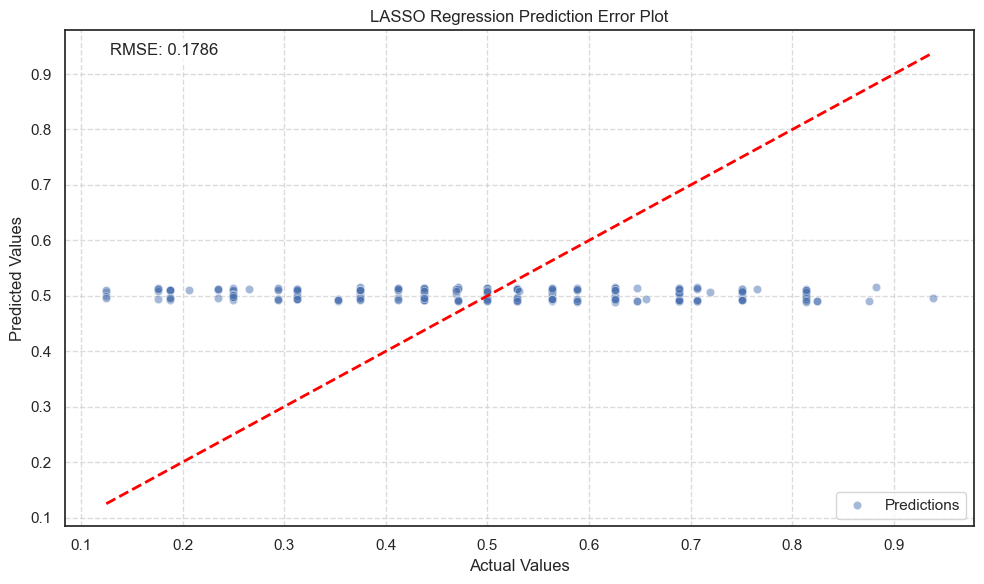

In [394]:
lasso_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=lasso_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {lasso_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("LASSO Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

lasso_pred_error_plot.tight_layout()

lasso_pred_error_plot.savefig(f'{project_data_exports_path}/lasso_pred_error_plot.png', dpi=300, bbox_inches='tight')

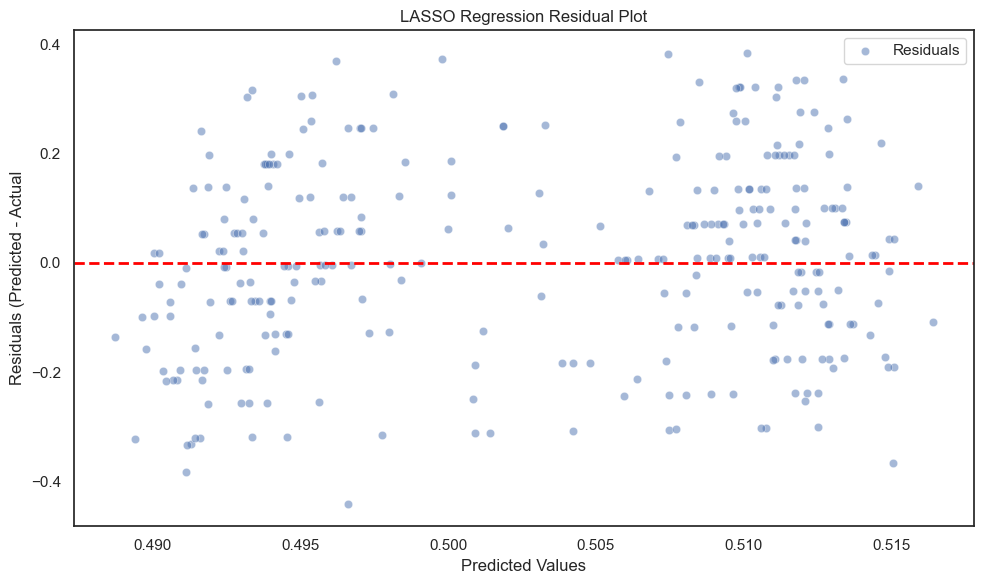

In [395]:
lasso_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=lasso_preds,
    y=lasso_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("LASSO Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
lasso_residuals_plot.tight_layout()

lasso_residuals_plot.savefig(f'{project_data_exports_path}/lasso_residuals_plot.png', dpi=300, bbox_inches='tight')

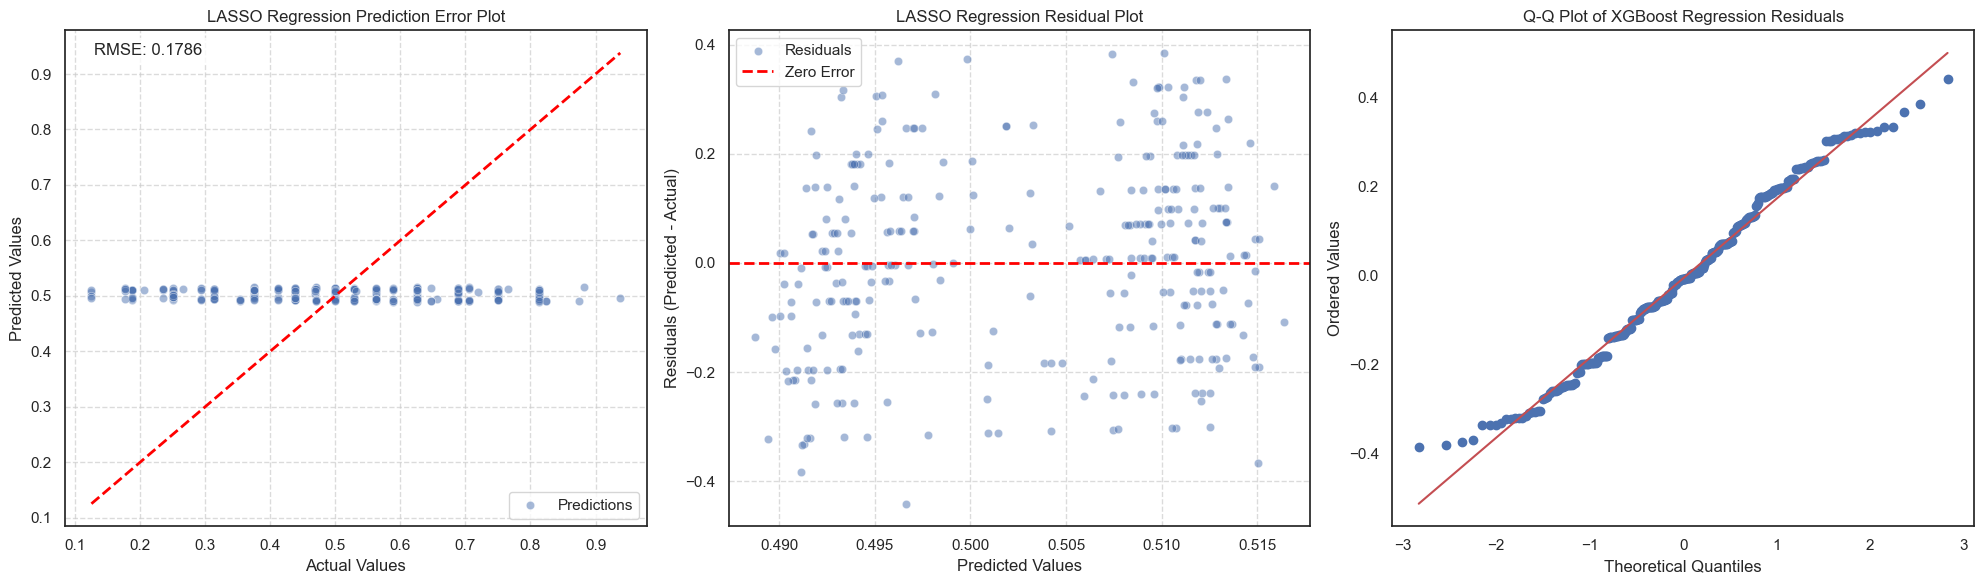

In [396]:
# Assuming y_test and rf_preds are defined from your model
lasso_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=lasso_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {lasso_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("LASSO Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=lasso_preds,
    y=lasso_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("LASSO Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
lasso_resids = y_test - lasso_preds
stats.probplot(lasso_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of XGBoost Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")

# Adjust layout
lasso_pred_error_residuals_qq_plot.tight_layout()
lasso_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/lasso_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

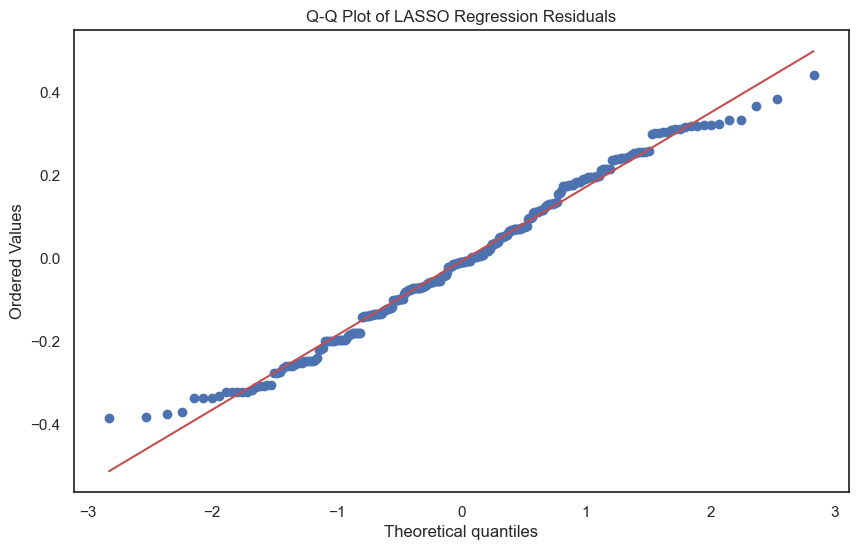

In [397]:
lasso_resids = y_test - lasso_preds
lasso_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(lasso_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of LASSO Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

lasso_qq_plot.savefig(f'{project_data_exports_path}/lasso_qq_plot.png', dpi=300, bbox_inches='tight')

# Elasticnet

In [398]:
# Define the preprocessor
elasticnet_alpha_plot_preprocessor = create_preprocessor(
    is_tree_based=False,
    selected_numeric_features=selected_numeric_features,
    selected_categorical_features=selected_categorical_features,
)

# Fit the preprocessor on the training data
elasticnet_alpha_plot_preprocessor.fit(X_train)

# Get the transformed feature names
elasticnet_alpha_feature_names_transformed = elasticnet_alpha_plot_preprocessor.get_feature_names_out()

# Transform the training data
elasticnet_alpha_X_train_transformed = elasticnet_alpha_plot_preprocessor.transform(X_train)

# Initialize the dictionary to store coefficients
elasticnet_alpha_coefficients = {feature: [] for feature in elasticnet_alpha_feature_names_transformed}
elasticnet_alpha_coefficients['alpha'] = []

# Define a range of alpha values
n_elasticnet_alphas = 500
elasticnet_alpha_values = np.logspace(-10, 7, n_elasticnet_alphas)
l1_ratio = 0.5  # Fixing l1_ratio for this plot

# Fit ElasticNet for each alpha
for alpha in elasticnet_alpha_values:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True, max_iter=20000)
    elasticnet.fit(elasticnet_alpha_X_train_transformed, y_train)  # Use transformed data
    for i, feature in enumerate(elasticnet_alpha_feature_names_transformed):
        elasticnet_alpha_coefficients[feature].append(elasticnet.coef_[i])
    elasticnet_alpha_coefficients['alpha'].append(alpha)

# Create a dataframe
elasticnet_alpha_coefficients_df = pd.DataFrame(elasticnet_alpha_coefficients)

# Melt the dataframe for easy plotting
elasticnet_alpha_coefficients_df_melted = elasticnet_alpha_coefficients_df.melt(
    id_vars='alpha', var_name='Feature', value_name='Coefficient'
)

elasticnet_alpha_coefficients_df_melted

,alpha,Feature,Coefficient
0,1.000000e-10,num__cap_hit_prop,0.004308
1,1.081604e-10,num__cap_hit_prop,0.004308
2,1.169866e-10,num__cap_hit_prop,0.004308
3,1.265332e-10,num__cap_hit_prop,0.004308
4,1.368587e-10,num__cap_hit_prop,0.004308
...,...,...,...
995,7.306804e+06,num__player_count_prop,-0.000000
996,7.903066e+06,num__player_count_prop,-0.000000
997,8.547985e+06,num__player_count_prop,-0.000000
998,9.245531e+06,num__player_count_prop,-0.000000


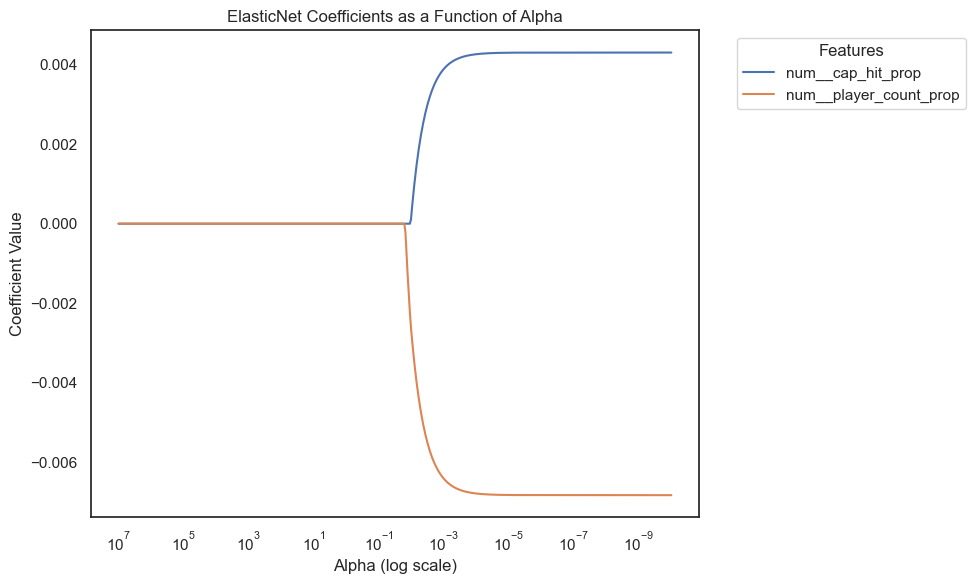

In [399]:
elasticnet_alpha_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.lineplot(
    data=elasticnet_alpha_coefficients_df_melted,
    x='alpha',
    y='Coefficient',
    hue='Feature',
    ax=ax)

# Customize the plot
ax.set_xscale('log')  # Use logarithmic scale for alpha
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_title('ElasticNet Coefficients as a Function of Alpha')
ax.set_xlabel('Alpha (log scale)')
ax.set_ylabel('Coefficient Value')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

elasticnet_alpha_plot.tight_layout()
elasticnet_alpha_plot.savefig(f'{project_data_exports_path}/elasticnet_alpha_plot.png', dpi=300, bbox_inches='tight')

In [400]:
elasticnet_pipe = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features,
        scale_numeric=True,
    )),
    ('regressor', ElasticNet())
])

elasticnet_pipe.get_params()

elasticnet_params = [
    {
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],  # Different scalers

        # ElasticNet regression hyperparameters
        'regressor__alpha': np.logspace(-4, -1, 100),
        'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        'regressor__fit_intercept': [True, False],
        'regressor__max_iter': [20000]  # Increased iteration limits
    }
]

elasticnet_gs = GridSearchCV(estimator=elasticnet_pipe,
                        param_grid=elasticnet_params,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

# Calculate RMSE using cross_val_score
elasticnet_scores = cross_val_score(
    elasticnet_gs,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
elasticnet_rmse_scores = np.sqrt(-elasticnet_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {elasticnet_rmse_scores}")
print(f"Average RMSE from CV: {elasticnet_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {elasticnet_rmse_scores.std():.4f}")

# Fit the model on the training set
elasticnet_gs.fit(X_train, y_train)

# Extract best parameters and model
elasticnet_best_params = elasticnet_gs.best_params_
elasticnet_best_pipe = elasticnet_gs.best_estimator_

# Predict on the test set
elasticnet_preds = elasticnet_gs.predict(X_test)

# Calculate RMSE on the test set
elasticnet_rmse = np.sqrt(mean_squared_error(y_test, elasticnet_preds))

# Report results
print(f"Best Parameters: {elasticnet_best_params}")
print(f"Test RMSE: {elasticnet_rmse:.4f}")

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Cross-Validation RMSE Scores: [0.18107332 0.19589528 0.21078478 0.19220164 0.20574255 0.18240295
 0.21395663 0.21294168 0.19413451 0.18570853]
Average RMSE from CV: 0.1975
Standard Deviation of RMSE from CV: 0.0120
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Best Parameters: {'preprocessor__num': MinMaxScaler(), 'regressor__alpha': 0.0004641588833612782, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.1, 'regressor__max_iter': 20000}
Test RMSE: 0.1786


In [401]:
joblib.dump(elasticnet_gs, project_pt_1_models_path / 'elasticnet_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/elasticnet_model.pkl']

In [402]:
# Get the transformed feature names after one-hot encoding and scaling
elasticnet_feature_names_transformed = elasticnet_best_pipe.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Ridge Regression model
elasticnet_coefs = elasticnet_best_pipe.named_steps['regressor'].coef_.flatten()
elasticnet_intercept = elasticnet_best_pipe.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
elasticnet_coef_df = pd.DataFrame({'Feature': elasticnet_feature_names_transformed, 'Coefficient': elasticnet_coefs})

# Add the intercept row
elasticnet_intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [elasticnet_intercept]})
elasticnet_coef_df = pd.concat([elasticnet_intercept_df, elasticnet_coef_df], ignore_index=True)

# Display the DataFrame with coefficients
elasticnet_coef_df.to_csv(f'{project_data_exports_path}/elasticnet_coef_df.csv')
elasticnet_coef_df

,Feature,Coefficient
0,Intercept,0.512932
1,num__cap_hit_prop,0.015510
2,num__player_count_prop,-0.036255


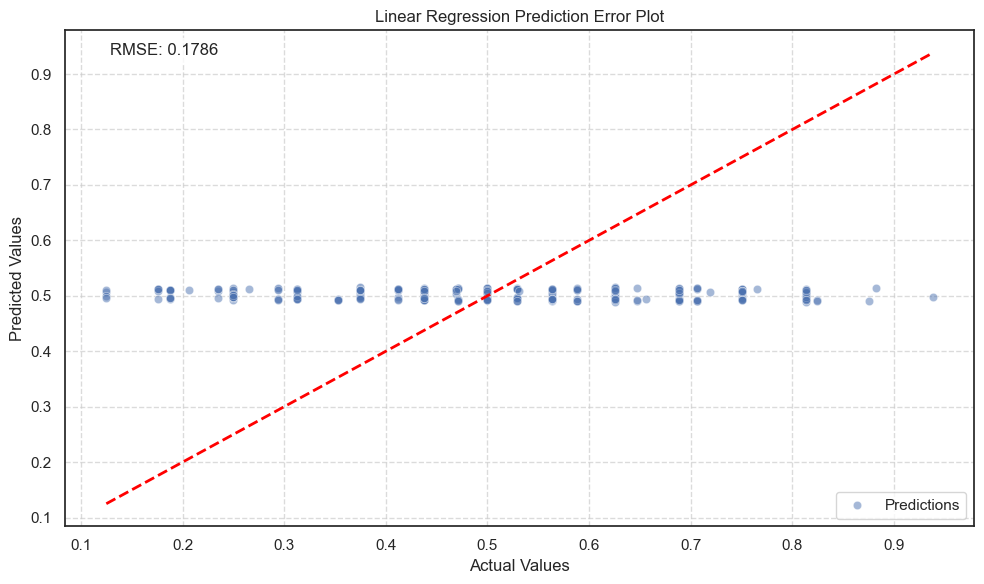

In [403]:
elasticnet_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=elasticnet_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {elasticnet_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Linear Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

elasticnet_pred_error_plot.tight_layout()

elasticnet_pred_error_plot.savefig(f'{project_data_exports_path}/elasticnet_pred_error_plot.png', dpi=300, bbox_inches='tight')

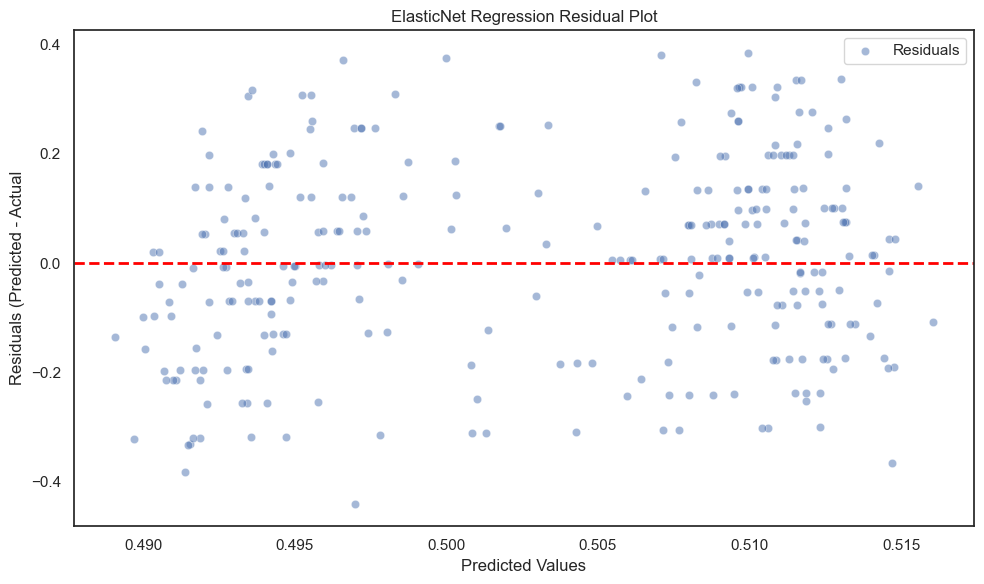

In [404]:
elasticnet_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=elasticnet_preds,
    y=elasticnet_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("ElasticNet Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
elasticnet_residuals_plot.tight_layout()

elasticnet_residuals_plot.savefig(f'{project_data_exports_path}/elasticnet_residuals_plot.png', dpi=300, bbox_inches='tight')

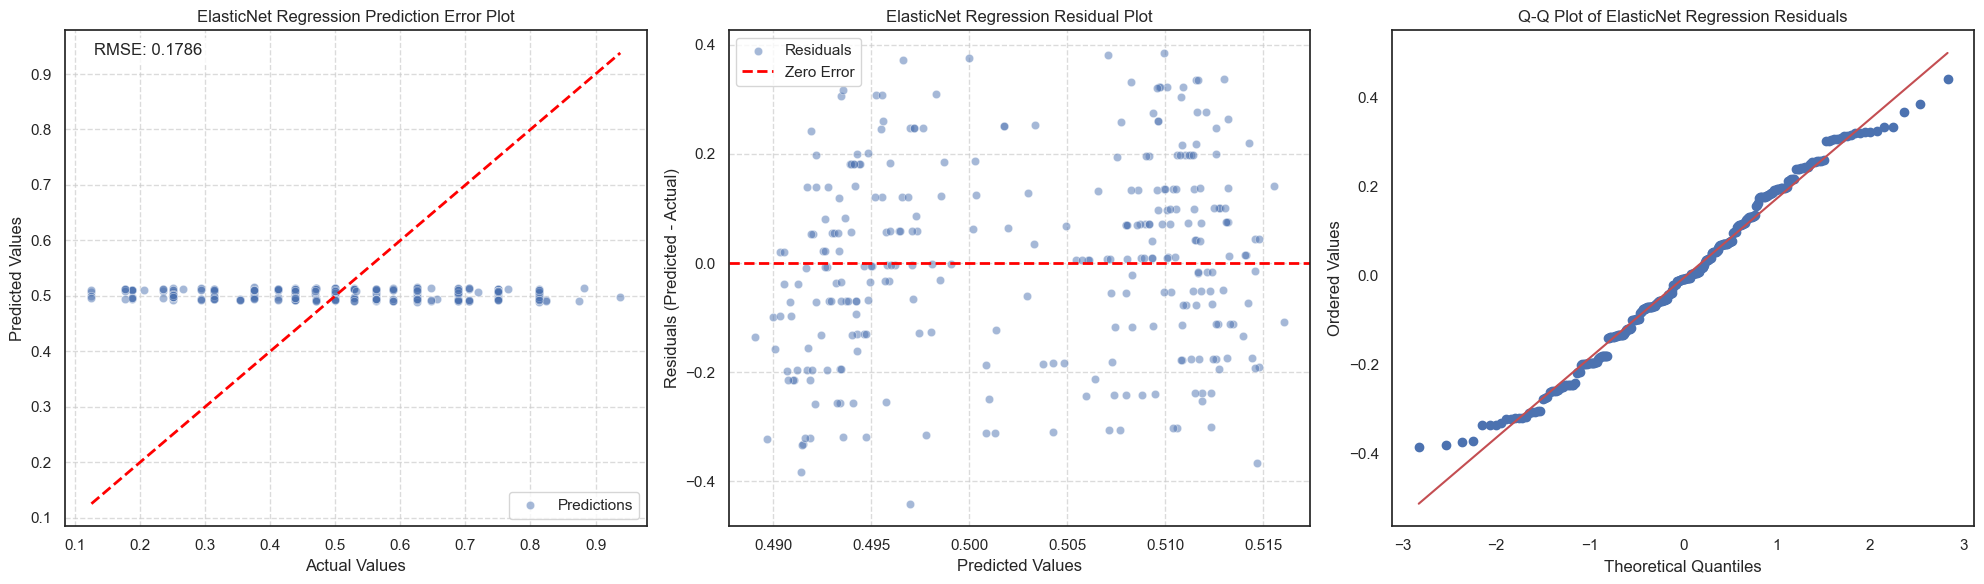

In [405]:
# Assuming y_test and rf_preds are defined from your model
elasticnet_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=elasticnet_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {elasticnet_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("ElasticNet Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=elasticnet_preds,
    y=elasticnet_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("ElasticNet Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
elasticnet_resids = y_test - elasticnet_preds
stats.probplot(elasticnet_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of ElasticNet Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")

# Adjust layout
elasticnet_pred_error_residuals_qq_plot.tight_layout()
elasticnet_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/elasticnet_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

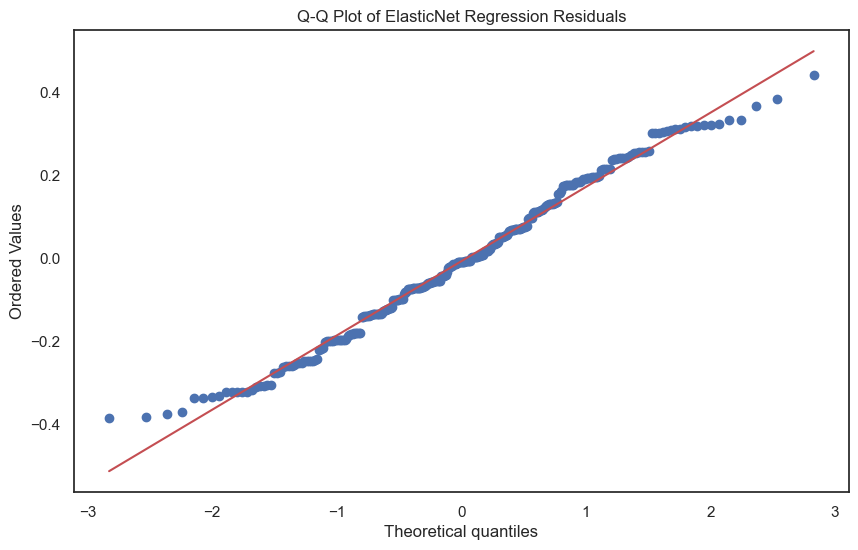

In [406]:
elasticnet_resids = y_test - elasticnet_preds
elasticnet_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(elasticnet_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of ElasticNet Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

elasticnet_qq_plot.savefig(f'{project_data_exports_path}/elasticnet_qq_plot.png', dpi=300, bbox_inches='tight')

# XGBoost

In [407]:
xgbr_pipe = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=True, 
        selected_categorical_features=selected_categorical_features, 
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', XGBRegressor(random_state=0))
])
xgbr_pipe.get_params()

xgbr_params = [
    {
        'regressor__n_estimators': [100],
        'regressor__max_depth': [3, 5, 10],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__subsample': [0.8, 1.0],
        'regressor__colsample_bytree': [0.8, 1.0],
        'regressor__min_child_weight': [1, 3, 5]
    }]

xgbr_gs = GridSearchCV(
    estimator=xgbr_pipe,
    param_grid=xgbr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Calculate RMSE using cross_val_score
xgbr_scores = cross_val_score(
    xgbr_gs,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
xgbr_rmse_scores = np.sqrt(-xgbr_scores)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {xgbr_rmse_scores}")
print(f"Average RMSE from CV: {xgbr_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {xgbr_rmse_scores.std():.4f}")

# Fit the model on the training set
xgbr_gs.fit(X_train, y_train)

# Extract best parameters and model
xgbr_best_params = xgbr_gs.best_params_
xgbr_best_pipe = xgbr_gs.best_estimator_

# Predict on the test set
xgbr_preds = xgbr_gs.predict(X_test)

# Calculate RMSE on the test set
xgbr_rmse = np.sqrt(mean_squared_error(y_test, xgbr_preds))

# Report results
print(f"Best Parameters: {xgbr_best_params}")
print(f"Test RMSE: {xgbr_rmse:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Cross-Validation RMSE Scores: [0.15417762 0.17631479 0.1915458  0.1592384  0.18751873 0.1513637
 0.18330122 0.17793529 0.18315102 0.16143266]
Average RMSE from CV: 0.1726
Standard Deviation of RMSE from CV: 0.0139
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.01, 'regr

In [408]:
joblib.dump(xgbr_gs, project_pt_1_models_path / 'xgbr_model.pkl')

['/Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/models/pt_1/xgbr_model.pkl']

In [409]:
# Extract the trained DecisionTreeRegressor
optimized_xgbr = xgbr_best_pipe.named_steps['regressor']

# Access the parameters of the optimized tree
best_xgbr_params = optimized_xgbr.get_params()

# Display the best parameters
print("Best Parameters for the XGB Regressor:")
for param, value in best_xgbr_params.items():
    print(f"{param}: {value}")

Best Parameters for the XGB Regressor:
objective: reg:squarederror
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: 1.0
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
feature_weights: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.01
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 3
max_leaves: None
min_child_weight: 5
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 100
n_jobs: None
num_parallel_tree: None
random_state: 0
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: 0.8
tree_method: None
validate_parameters: None
verbosity: None


In [410]:
# Get feature importance scores
xgbr_feature_importances = optimized_rf.feature_importances_

# Get feature names from the fitted preprocessor
xgbr_preprocessor = xgbr_best_pipe.named_steps['preprocessor']
xgbr_feature_names = xgbr_preprocessor.get_feature_names_out()

# Debug: Print lengths to diagnose mismatch
print(f"Length of xgbr_feature_names: {len(xgbr_feature_names)}")
print(f"Length of xgbr_feature_importances: {len(xgbr_feature_importances)}")
print(f"xgbr_feature_names: {xgbr_feature_names}")
print(f"xgbr_feature_importances: {xgbr_feature_importances}")

# Create a DataFrame for feature importances, ensuring alignment
if len(xgbr_feature_names) != len(xgbr_feature_importances):
    print("Warning: Mismatch in feature names and importances. Using original feature names.")
    xgbr_feature_names = [f'num__{name}' for name in selected_numeric_features]
xgbr_importance_df = pd.DataFrame({
    'Feature': xgbr_feature_names,
    'Importance': xgbr_feature_importances
}).sort_values(by='Importance', ascending=False)


# Display the feature importances
print("Feature Importances:")
print(xgbr_importance_df)

Length of xgbr_feature_names: 2
Length of xgbr_feature_importances: 2
xgbr_feature_names: ['num__cap_hit_prop' 'num__player_count_prop']
xgbr_feature_importances: [0.86341197 0.13658803]
Feature Importances:
                  Feature  Importance
0       num__cap_hit_prop    0.863412
1  num__player_count_prop    0.136588


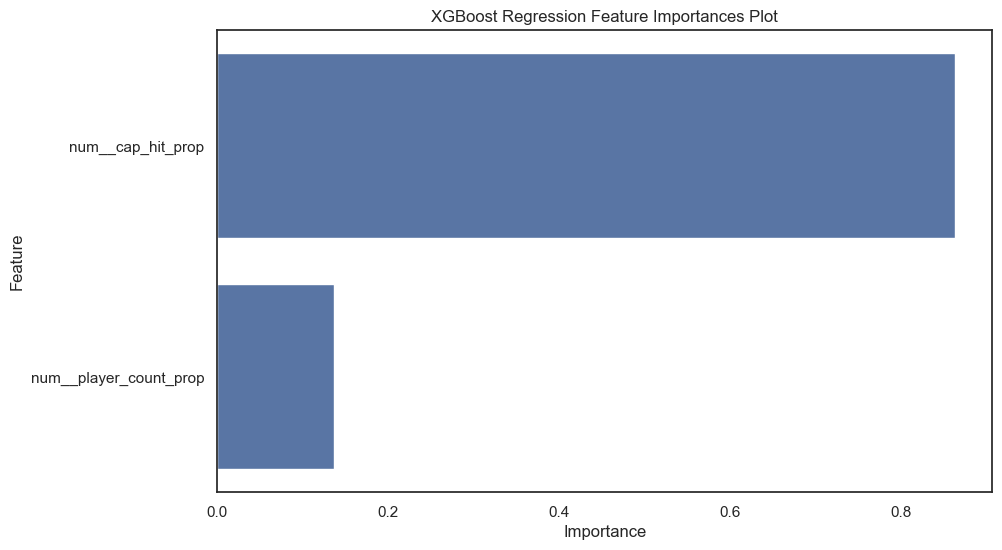

In [411]:
xgbr_feat_imp_plot, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
sns.barplot(
    data=xgbr_importance_df,
    x='Importance',
    y='Feature',
    ax=ax
)
ax.set_title("XGBoost Regression Feature Importances Plot")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

xgbr_feat_imp_plot.savefig(f'{project_data_exports_path}/xgbr_feat_imp_plot.png', dpi=300, bbox_inches='tight')

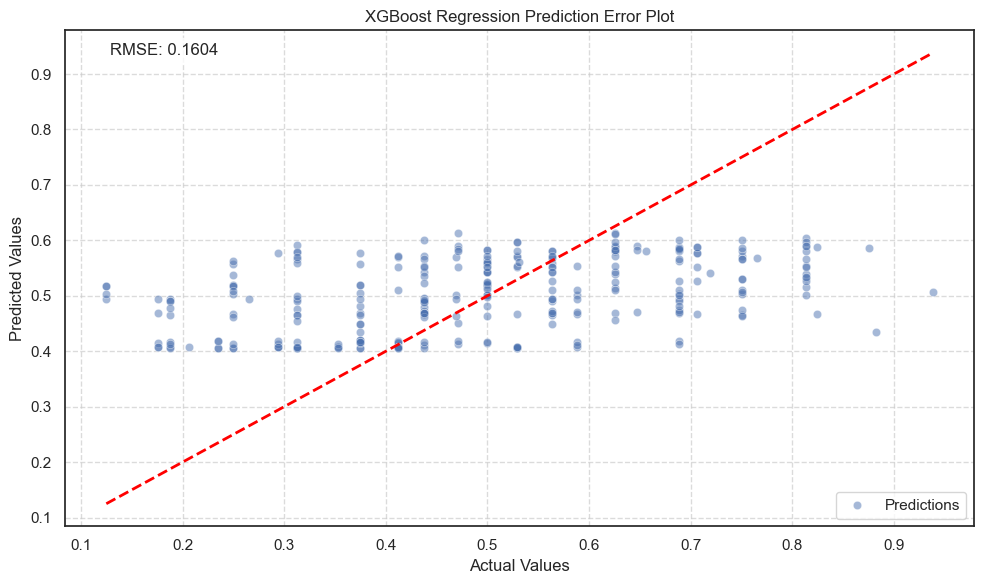

In [412]:
xgbr_pred_error_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y_test,
    y=xgbr_preds,
    alpha=0.5,
    ax=ax,
    label='Predictions'
    )

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

# Display RMSE
ax.text(0.05, 0.95, f'RMSE: {xgbr_rmse:.4f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("XGBoost Regression Prediction Error Plot")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

xgbr_pred_error_plot.tight_layout()

xgbr_pred_error_plot.savefig(f'{project_data_exports_path}/xgbr_pred_error_plot.png', dpi=300, bbox_inches='tight')

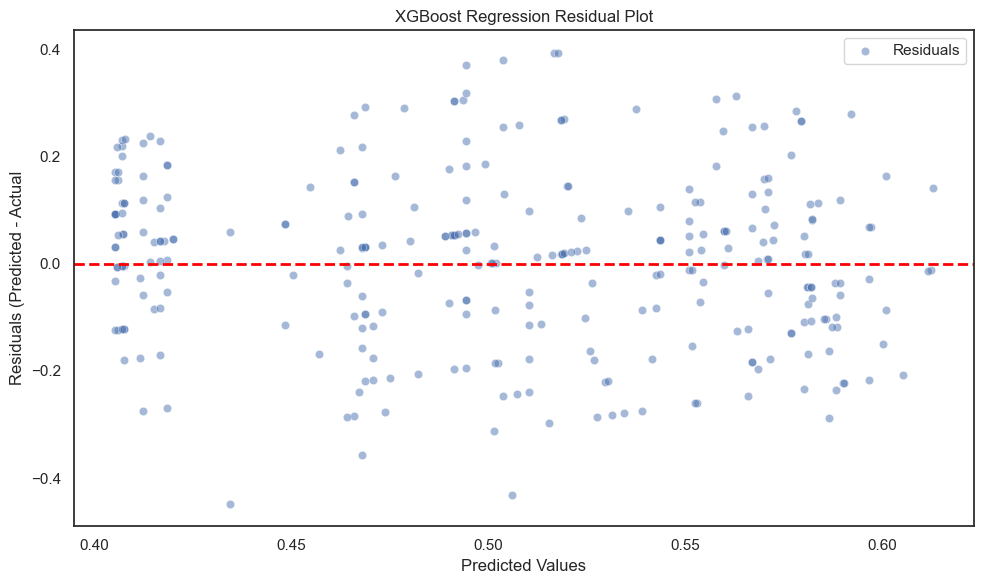

In [413]:
xgbr_residuals_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=xgbr_preds,
    y=xgbr_preds - y_test,
    ax=ax,
    alpha=0.5,
    label='Residuals',
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

ax.set_title("XGBoost Regression Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals (Predicted - Actual")
xgbr_residuals_plot.tight_layout()

xgbr_residuals_plot.savefig(f'{project_data_exports_path}/xgbr_residuals_plot.png', dpi=300, bbox_inches='tight')

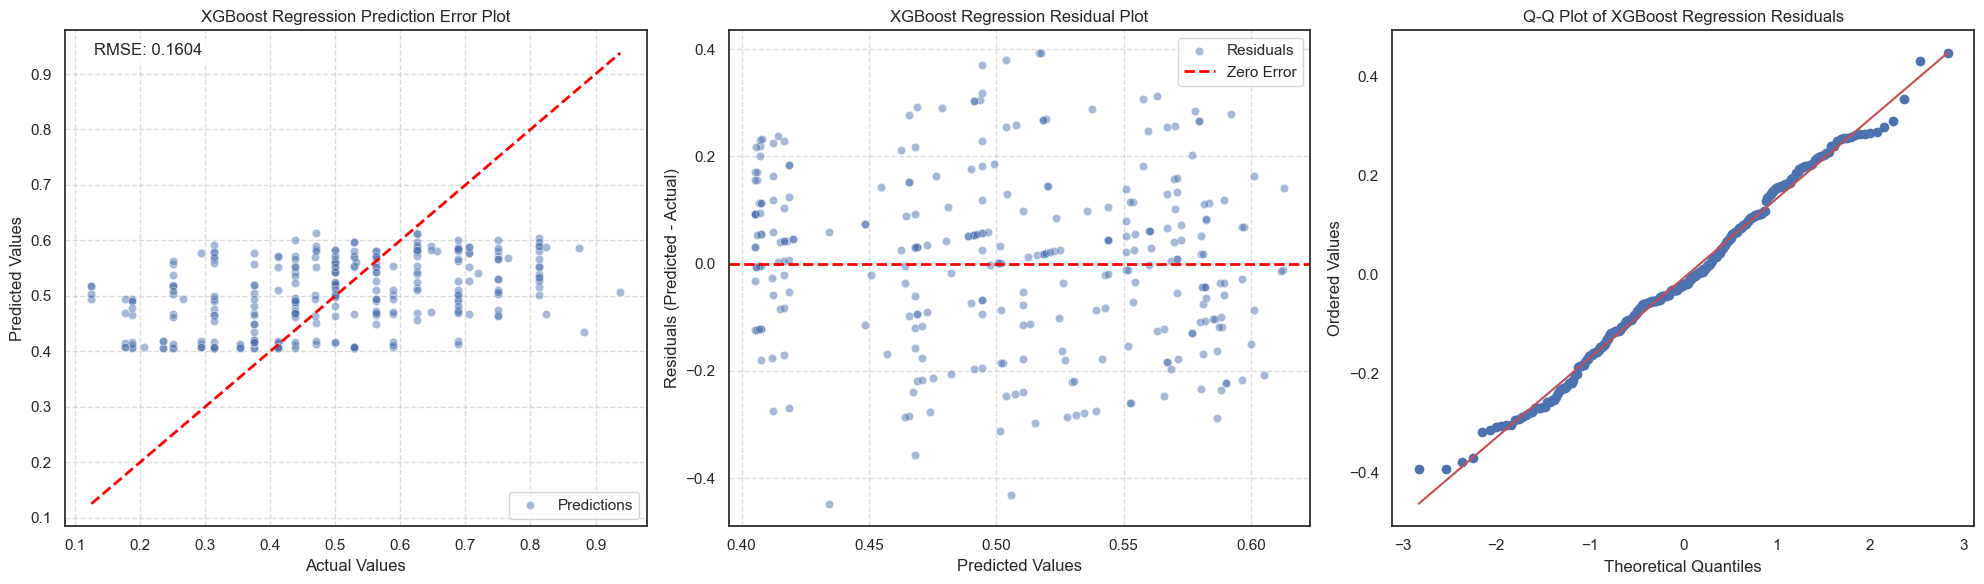

In [414]:
# Assuming y_test and xgbr_preds are defined from your model
xgbr_pred_error_residuals_qq_plot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Parity Plot (Actual vs. Predicted)
sns.scatterplot(
    x=y_test,
    y=xgbr_preds,
    alpha=0.5,
    ax=ax1,
    label='Predictions'
    )

ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
ax1.text(0.05, 0.95, f'RMSE: {xgbr_rmse:.4f}', transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("XGBoost Regression Prediction Error Plot")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Residual Plot
sns.scatterplot(
    x=xgbr_preds,
    y=xgbr_preds - y_test,
    ax=ax2,
    alpha=0.5,
    label='Residuals',
)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_title("XGBoost Regression Residual Plot")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals (Predicted - Actual)")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Q-Q Plot
xgbr_resids = y_test - xgbr_preds
stats.probplot(xgbr_resids, dist='norm', plot=ax3)
ax3.set_title('Q-Q Plot of XGBoost Regression Residuals')
ax3.set_xlabel("Theoretical Quantiles")
ax3.set_ylabel("Ordered Values")

# Adjust layout
xgbr_pred_error_residuals_qq_plot.tight_layout()
xgbr_pred_error_residuals_qq_plot.savefig(f'{project_data_exports_path}/xgbr_pred_error_residuals_qq_plot.png', dpi=300, bbox_inches='tight')

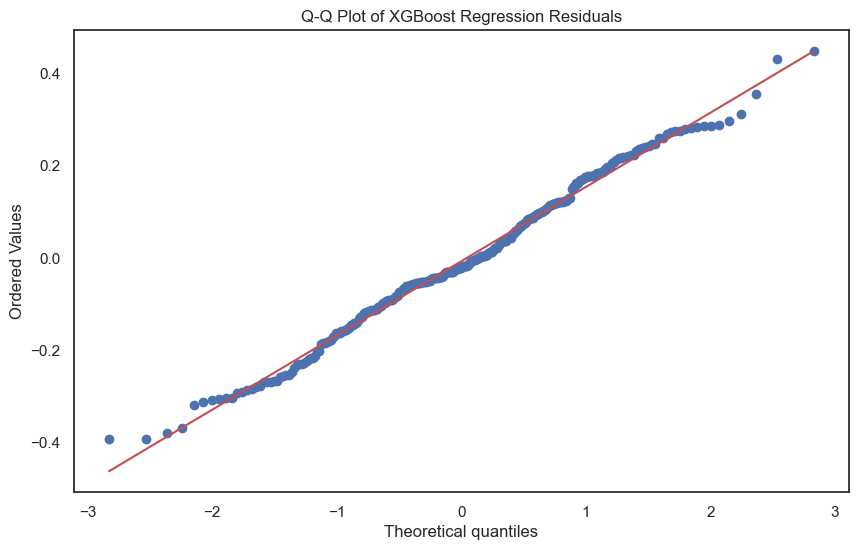

In [415]:
xgbr_resids = y_test - xgbr_preds
xgbr_qq_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(xgbr_resids, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of XGBoost Regression Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

xgbr_qq_plot.savefig(f'{project_data_exports_path}/xgbr_qq_plot.png', dpi=300, bbox_inches='tight')

# Model Comparisons

In [416]:
model_names = ['Linear Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'LASSO Regression', 'ElasticNet Regression', 'XGBoost Regression']

model_cv_mean_rmse = [lr_rmse_scores.mean(), knn_rmse_scores.mean(),tree_rmse_scores.mean(), rf_rmse_scores.mean(),
                      ridge_rmse_scores.mean(),lasso_rmse_scores.mean(),elasticnet_rmse_scores.mean(),
                      xgbr_rmse_scores.mean()]

model_cv_std_rmse = [lr_rmse_scores.std(), knn_rmse_scores.std(),tree_rmse_scores.std(), rf_rmse_scores.std(),
                     ridge_rmse_scores.std(),lasso_rmse_scores.std(),elasticnet_rmse_scores.std(),xgbr_rmse_scores.std()]

test_rmse = [lr_rmse, knn_rmse, tree_rmse, rf_rmse, ridge_rmse, lasso_rmse, elasticnet_rmse, xgbr_rmse]

In [417]:
model_results_df = pd.DataFrame(
    {
        'model_name': model_names,
        'cross_val_mean_rmse': model_cv_mean_rmse,
        'cross_val_std_rmse': model_cv_std_rmse,
        'test_rmse': test_rmse
    })
model_results_df.to_csv(f'{project_data_exports_path}/model_results_df.csv')
model_results_df

,model_name,cross_val_mean_rmse,cross_val_std_rmse,test_rmse
0,Linear Regression,0.197345,0.011958,0.178651
1,KNN Regression,0.165474,0.012666,0.156656
2,Decision Tree,0.168372,0.014149,0.164225
3,Random Forest,0.166482,0.014485,0.160439
4,Ridge Regression,0.197401,0.012049,0.178451
5,LASSO Regression,0.197483,0.011945,0.178631
6,ElasticNet Regression,0.197484,0.011969,0.178598
7,XGBoost Regression,0.172598,0.013940,0.160429


In [418]:
model_objects = {
    'Linear Regression': lr_gs,
    'KNN Regression': knn_gs,
    'Decision Tree': tree_gs,
    'Random Forest': rf_gs,
    'Ridge Regression': ridge_gs,
    'LASSO Regression': lasso_gs,
    'ElasticNet Regression': elasticnet_gs,
    'XGBoost Regression': xgbr_gs
}

In [419]:
model_predictions = {}
model_rmses = []

for model_name, model in model_objects.items():
    predictions, rmse = evaluate_model(model, X, y)
    model_predictions[model_name] = predictions
    model_rmses.append(rmse)

model_results_df['Original Dataset RMSE'] = model_rmses

In [420]:
model_results_df.to_csv(f'{project_data_exports_path}/model_results_df.csv')
model_results_df

,model_name,cross_val_mean_rmse,cross_val_std_rmse,test_rmse,Original Dataset RMSE
0,Linear Regression,0.197345,0.011958,0.178651,0.191330
1,KNN Regression,0.165474,0.012666,0.156656,0.090040
2,Decision Tree,0.168372,0.014149,0.164225,0.160390
3,Random Forest,0.166482,0.014485,0.160439,0.156285
4,Ridge Regression,0.197401,0.012049,0.178451,0.191272
5,LASSO Regression,0.197483,0.011945,0.178631,0.191324
6,ElasticNet Regression,0.197484,0.011969,0.178598,0.191314
7,XGBoost Regression,0.172598,0.013940,0.160429,0.164061


In [421]:
# Melt the data for easier plotting
model_results_melted_df = pd.melt(
    model_results_df,
    id_vars=["model_name"],
    value_vars=[
        "cross_val_mean_rmse",
        "test_rmse",
        "Original Dataset RMSE",
    ],
    var_name="Metric",
    value_name="RMSE",
)

# Rename metrics for better display
model_results_melted_df["Metric"] = model_results_melted_df["Metric"].replace(
    {
        "cross_val_mean_rmse": "Cross-Validation Mean RMSE",
        "test_rmse": "Test RMSE",
        "Original Dataset RMSE": "Original Dataset RMSE",
    }
)


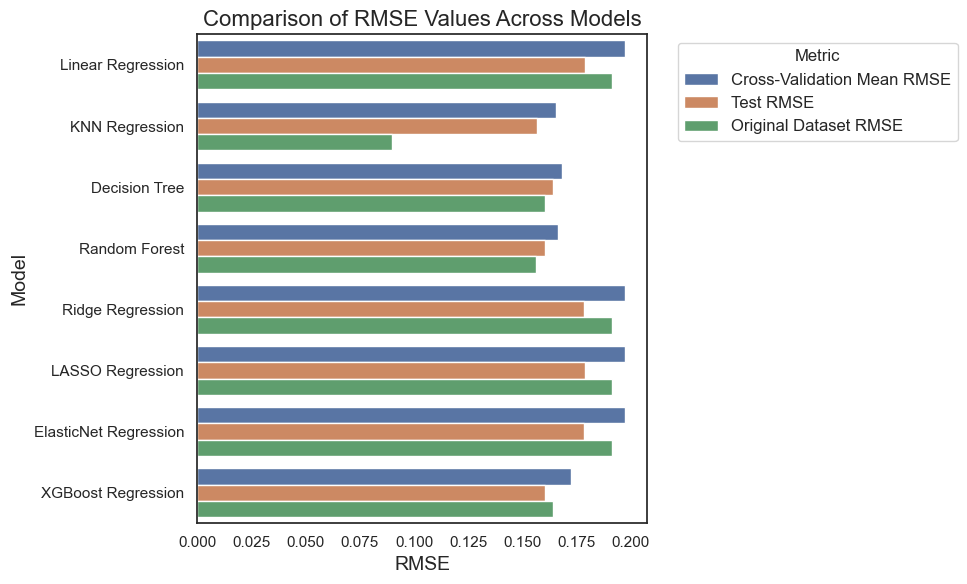

In [422]:
model_perf_rmse_plot, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.barplot(
    data=model_results_melted_df,
    x="RMSE",
    y="model_name",
    hue="Metric",
    # errorbar=('ci', 95),
    ax=ax
)

plt.title("Comparison of RMSE Values Across Models", fontsize=16)
plt.xlabel("RMSE", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.legend(title="Metric", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
model_perf_rmse_plot.tight_layout()

model_perf_rmse_plot.savefig(f'{project_data_exports_path}/model_perf_rmse_plot.png', dpi=300, bbox_inches='tight')